# Исследование объявлений о продаже квартир



## ОГЛАВЛЕНИЕ

1. [Описание проекта](#projekt)   
2. [Описание данных](#data)
3. [Открытие данных и изучение общей информации](#start)
4. [Предобработка данных](#preprocessing)   
5. [Добавление столбцов в таблицу](#adding)   
6. [Проведение исследовательского анализа данных](#analysis)
7. [Общий вывод](#conclusion)

## Описание проекта   
<a name="projekt"></a>

  В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  
  
  Необходимо изучить следующие параметры квартир: площадь, цена, число комнат, высота потолков, время продажи.  Описать, сколько обычно занимает продажа, когда можно считать, что продажи прошли очень быстро, а когда необычно долго? Нужно описать, какие особенности обнаружили, какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом, а также зависимость от даты размещения: дня недели, месяца и года. Надо выбрать 10 населённых пунктов с наибольшим числом объявлений, посчитать цену квадратного метра в этих населённых пунктах, выделить среди них населённые пункты с самой высокой и низкой стоимостью жилья. Выделить квартиры в Санкт-Петербурге, выяснить, какая область города входит в центр. Посчитать среднюю цену для каждого километра. Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).


## Описание данных   
<a name="data"></a>

 По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма).  
В наличии имеются следующие данные:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)   
- balcony — число балконов  
- ceiling_height — высота потолков (м)  
- cityCenters_nearest — расстояние до центра города (м)  
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
- first_day_exposition — дата публикации  
- floor — этаж  
- floors_total — всего этажей в доме  
- is_apartment — апартаменты (булев тип)  
- kitchen_area — площадь кухни в квадратных метрах (м²)  
- last_price — цена на момент снятия с публикации  
- living_area — жилая площадь в квадратных метрах(м²)  
- locality_name — название населённого пункта  
- open_plan — свободная планировка (булев тип)  
- parks_around3000 — число парков в радиусе 3 км  
- parks_nearest — расстояние до ближайшего парка (м)  
- ponds_around3000 — число водоёмов в радиусе 3 км  
- ponds_nearest — расстояние до ближайшего водоёма (м)  
- rooms — число комнат  
- studio — квартира-студия (булев тип)  
- total_area — площадь квартиры в квадратных метрах (м²)  
- total_images — число фотографий квартиры в объявлении  


### Шаг 1. Открытие данных и изучение общей информации    
<a name="start"></a>

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# прочитаем DataFrame
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
# выведем на экран 10 верхних строк DataFrame
df_copy = df.copy()
df.head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   
2             NaN           5.0        34.30      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0        32.00     13          NaN  ...   
5             NaN          12.0        14.40      5          NaN  ...   
6             NaN          26.0        10.60      6          NaN  ...   
7             NaN          24.0          NaN     22          NaN  ...   
8             NaN          27.0        15.43     26          NaN  ...   
9            2.50           9.0        43.60      7          NaN  ...   

   kitchen_area  balcony              locality_name  airports_nearest  \
0         25.00      NaN            Санкт-Петербург           18863.0   
1         11.00      2.0             посёлок Шушары           12817.0   
2          8.30      0.0            Санкт-Петербург           21741.0   
3           NaN      0.0            Санкт-Петербург           28098.0   
4         41.00      NaN            Санкт-Петербург           31856.0   
5          9.10      NaN  городской посёлок Янино-1               NaN   
6         14.40      1.0          посёлок Парголово           52996.0   
7         18.90      2.0            Санкт-Петербург           23982.0   
8          8.81      NaN             посёлок Мурино               NaN   
9          6.50      2.0            Санкт-Петербург           50898.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   
5                 NaN               NaN            NaN               NaN   
6             19143.0               0.0            NaN               0.0   
7             11634.0               0.0            NaN               0.0   
8                 NaN               NaN            NaN               NaN   
9             15008.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  
5            NaN             55.0  
6            NaN            155.0  
7            NaN              NaN  
8            NaN            189.0  
9            NaN            289.0  

[10 rows x 22 columns]

In [4]:
# приведем DataFrame к выводу в полном размере, а вещественные значения к формату
# с двумя знаками после запятой
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
# выведем на экран 10 нижних строк DataFrame
df.tail(10)

total_images    last_price  total_area first_day_exposition  rooms  \
23689            13  3,550,000.00       35.30  2018-02-28T00:00:00      1   
23690             3  5,500,000.00       52.00  2018-07-19T00:00:00      2   
23691            11  9,470,000.00       72.90  2016-10-13T00:00:00      2   
23692             2  1,350,000.00       30.00  2017-07-07T00:00:00      1   
23693             9  4,600,000.00       62.40  2016-08-05T00:00:00      3   
23694             9  9,700,000.00      133.81  2017-03-21T00:00:00      3   
23695            14  3,100,000.00       59.00  2018-01-15T00:00:00      3   
23696            18  2,500,000.00       56.70  2018-02-11T00:00:00      2   
23697            13 11,475,000.00       76.75  2017-03-28T00:00:00      2   
23698             4  1,350,000.00       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
23689            2.86         15.00        16.30      4          NaN   False   
23690             nan          5.00        31.00      2          NaN   False   
23691            2.75         25.00        40.30      7          NaN   False   
23692             nan          5.00        17.50      4          NaN   False   
23693            2.60          9.00        40.00      8          NaN   False   
23694            3.70          5.00        73.30      3          NaN   False   
23695             nan          5.00        38.00      4          NaN   False   
23696             nan          3.00        29.70      1          NaN   False   
23697            3.00         17.00          nan     12          NaN   False   
23698            2.50          5.00        12.30      1          NaN   False   

       open_plan  kitchen_area  balcony        locality_name  \
23689      False          9.10     2.00      Санкт-Петербург   
23690      False          6.00      nan      Санкт-Петербург   
23691      False         10.60     1.00      Санкт-Петербург   
23692      False          6.00      nan               Тихвин   
23693      False          8.00     0.00             Петергоф   
23694      False         13.83      nan      Санкт-Петербург   
23695      False          8.50      nan                Тосно   
23696      False           nan      nan     село Рождествено   
23697      False         23.30     2.00      Санкт-Петербург   
23698      False          9.00      nan  поселок Новый Учхоз   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
23689         17,284.00            16,081.00              1.00         353.00   
23690         20,151.00             6,263.00              1.00         300.00   
23691         19,424.00             4,489.00              0.00            nan   
23692               nan                  nan               nan            nan   
23693         45,602.00            34,104.00              1.00         352.00   
23694         24,665.00             4,232.00              1.00         796.00   
23695               nan                  nan               nan            nan   
23696               nan                  nan               nan            nan   
23697         39,140.00            10,364.00              2.00         173.00   
23698               nan                  nan               nan            nan   

       ponds_around3000  ponds_nearest  days_exposition  
23689              2.00         652.00            29.00  
23690              0.00            nan            15.00  
23691              1.00         806.00           519.00  
23692               nan            nan           413.00  
23693              1.00         675.00           239.00  
23694              3.00         381.00              nan  
23695               nan            nan            45.00  
23696               nan            nan              nan  
23697              3.00         196.00           602.00  
23698               nan            nan              nan

In [6]:
# выведем на экран 10 случайных строк DataFrame
df.sample(10)

total_images   last_price  total_area first_day_exposition  rooms  \
10960             8 4,499,000.00       76.00  2017-05-26T00:00:00      3   
22042             6   890,000.00       46.00  2018-02-21T00:00:00      2   
5594             16 5,260,000.00       62.10  2018-09-25T00:00:00      3   
23061             6 1,000,000.00       43.00  2016-04-14T00:00:00      2   
22882             5 4,600,000.00       46.00  2017-07-17T00:00:00      1   
19341             0 3,300,000.00       42.00  2018-02-01T00:00:00      2   
20387            11 3,750,000.00       35.30  2018-10-08T00:00:00      1   
13808            13 3,220,000.00       42.30  2018-10-19T00:00:00      2   
10289             9 1,900,000.00       61.50  2019-04-17T00:00:00      3   
19386            10 3,380,000.00       43.00  2017-02-10T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
10960             nan         10.00        42.00      2          NaN   False   
22042            2.60          3.00        31.50      2          NaN   False   
5594             2.50          9.00        39.40      2          NaN   False   
23061             nan          5.00        30.00      2          NaN   False   
22882            2.65         14.00        19.00      5          NaN   False   
19341            2.50          9.00        26.00      8          NaN   False   
20387            2.50         12.00        20.00      1          NaN   False   
13808            2.50          3.00        27.30      1          NaN   False   
10289             nan          5.00        46.90      5          NaN   False   
19386            2.60         10.00        17.20      8          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
10960      False          8.00     0.00  Санкт-Петербург         18,914.00   
22042      False          6.00     1.00           Сланцы               nan   
5594       False          9.40      nan  Санкт-Петербург         14,888.00   
23061      False          6.00     0.00           Сланцы               nan   
22882      False         15.00     2.00  Санкт-Петербург         35,723.00   
19341      False          9.00     1.00          Колпино         25,646.00   
20387      False         10.00      nan  Санкт-Петербург         13,037.00   
13808      False          5.00      nan         Петергоф         39,086.00   
10289      False          5.90     1.00        Приозерск               nan   
19386      False         10.20     0.00       Всеволожск               nan   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
10960            22,339.00              0.00            nan              2.00   
22042                  nan               nan            nan               nan   
5594             16,932.00              0.00            nan              0.00   
23061                  nan               nan            nan               nan   
22882            16,024.00              1.00         620.00              3.00   
19341            31,432.00              1.00         254.00              1.00   
20387             9,869.00              0.00            nan              0.00   
13808            31,072.00              3.00         285.00              0.00   
10289                  nan               nan            nan               nan   
19386                  nan               nan            nan               nan   

       ponds_nearest  days_exposition  
10960         147.00           138.00  
22042            nan           192.00  
5594             nan            31.00  
23061            nan            91.00  
22882         422.00           122.00  
19341         774.00            11.00  
20387            nan            92.00  
13808            nan            19.00  
10289            nan              nan  
19386            nan            76.00

In [7]:
# проведем базовую проверку столбцов DataFrame с количественными переменными 
df.describe()

total_images     last_price  total_area     rooms  ceiling_height  \
count     23,699.00      23,699.00   23,699.00 23,699.00       14,504.00   
mean           9.86   6,541,548.77       60.35      2.07            2.77   
std            5.68  10,887,013.27       35.65      1.08            1.26   
min            0.00      12,190.00       12.00      0.00            1.00   
25%            6.00   3,400,000.00       40.00      1.00            2.52   
50%            9.00   4,650,000.00       52.00      2.00            2.65   
75%           14.00   6,800,000.00       69.90      3.00            2.80   
max           50.00 763,000,000.00      900.00     19.00          100.00   

       floors_total  living_area     floor  kitchen_area   balcony  \
count     23,613.00    21,796.00 23,699.00     21,421.00 12,180.00   
mean          10.67        34.46      5.89         10.57      1.15   
std            6.60        22.03      4.89          5.91      1.07   
min            1.00         2.00      1.00          1.30      0.00   
25%            5.00        18.60      2.00          7.00      0.00   
50%            9.00        30.00      4.00          9.10      1.00   
75%           16.00        42.30      8.00         12.00      2.00   
max           60.00       409.70     33.00        112.00      5.00   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count         18,157.00            18,180.00         18,181.00       8,079.00   
mean          28,793.67            14,191.28              0.61         490.80   
std           12,630.88             8,608.39              0.80         342.32   
min                0.00               181.00              0.00           1.00   
25%           18,585.00             9,238.00              0.00         288.00   
50%           26,726.00            13,098.50              0.00         455.00   
75%           37,273.00            16,293.00              1.00         612.00   
max           84,869.00            65,968.00              3.00       3,190.00   

       ponds_around3000  ponds_nearest  days_exposition  
count         18,181.00       9,110.00        20,518.00  
mean               0.77         517.98           180.89  
std                0.94         277.72           219.73  
min                0.00          13.00             1.00  
25%                0.00         294.00            45.00  
50%                1.00         502.00            95.00  
75%                1.00         729.00           232.00  
max                3.00       1,344.00         1,580.00

In [8]:
# проведем базовую проверку столбцов DataFrame с категориальными переменными 
for column in df.columns:
    if (df[column].dtype == 'object') | (df[column].dtype == 'bool'):        
        print(column)
        print()
        print(df[column].describe())
        print()
        print(df[column].unique())
        print()
        print()

first_day_exposition

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']


is_apartment

count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

[nan False True]


studio

count     23699
unique        2
top       False
freq      23550
Name: studio, dtype: object

[False  True]


open_plan

count     23699
unique        2
top       False
freq      23632
Name: open_plan, dtype: object

[False  True]


locality_name

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 

In [9]:
# посмотрим сводную информацию DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [10]:
# посчитаем количество строк DataFrame с нулевым значением количества комнат в квартире
df[df['rooms'] == 0]['rooms'].count()

197

In [11]:
# предположим, что все квартиры с нулевым значением количества комнат являются квартирами-студиями
# или квартирами с открытой планировкой
# посчитаем количество строк DataFrame с нулевым значением количества комнат в квартире для квартир-студий
# или квартир с открытой планировкой
df.query('rooms == 0 and (studio == True or open_plan == True)')['rooms'].count()
# предположение подтвердилось

197

In [12]:
# выведем на экран строки DataFrame со значениями высоты потолков в квартире менее 2 и более 6
df[(df['ceiling_height'] < 2) | (df['ceiling_height'] > 6)].sort_values(by = 'ceiling_height')

total_images    last_price  total_area first_day_exposition  rooms  \
22590            16  6,000,000.00       55.00  2018-10-31T00:00:00      2   
5712              5  1,500,000.00       42.80  2017-08-14T00:00:00      2   
16934             5  4,100,000.00       40.00  2017-10-17T00:00:00      1   
3474              3  1,400,000.00       30.00  2018-03-16T00:00:00      1   
17442             0  5,350,000.00       54.00  2015-06-16T00:00:00      2   
15743            14  5,600,000.00       67.00  2016-11-11T00:00:00      3   
5863             20  5,650,000.00       45.00  2018-08-15T00:00:00      1   
22309            20  5,300,000.00       45.00  2017-09-30T00:00:00      1   
15061            19  5,600,000.00       56.40  2018-05-11T00:00:00      2   
17496            15  6,700,000.00       92.90  2019-02-19T00:00:00      3   
20507            12  5,950,000.00       60.00  2018-02-19T00:00:00      2   
5076              0  3,850,000.00       30.50  2018-10-03T00:00:00      1   
355              17  3,600,000.00       55.20  2018-07-12T00:00:00      2   
18545             6  3,750,000.00       43.00  2019-03-18T00:00:00      2   
14382             9  1,700,000.00       35.00  2015-12-04T00:00:00      1   
4643              0  4,300,000.00       45.00  2018-02-01T00:00:00      2   
9379              5  3,950,000.00       42.00  2017-03-26T00:00:00      3   
6246              6  3,300,000.00       44.40  2019-03-25T00:00:00      2   
11285             0  1,950,000.00       37.00  2019-03-20T00:00:00      1   
5669              4  4,400,000.00       50.00  2017-08-08T00:00:00      2   
20478            11  8,000,000.00       45.00  2017-07-18T00:00:00      1   
21824            20  2,450,000.00       44.00  2019-02-12T00:00:00      2   
4876              7  3,000,000.00       25.00  2017-09-27T00:00:00      0   
22938            14  4,000,000.00       98.00  2018-03-15T00:00:00      4   
17857             1  3,900,000.00       56.00  2017-12-22T00:00:00      3   
5807             17  8,150,000.00       80.00  2019-01-09T00:00:00      2   
10773             8  3,800,000.00       58.00  2017-10-13T00:00:00      2   
5246              0  2,500,000.00       54.00  2017-10-13T00:00:00      2   
21377            19  4,900,000.00       42.00  2017-04-18T00:00:00      1   
22336            19  9,999,000.00       92.40  2019-04-05T00:00:00      2   
3148             14  2,900,000.00       75.00  2018-11-12T00:00:00      3   
22869             0 15,000,000.00       25.00  2018-07-25T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
22590            1.00         12.00        32.40      7          NaN   False   
5712             1.20          2.00        27.50      1          NaN   False   
16934            1.75         37.00        17.40      5          NaN   False   
3474             8.00          5.00        15.30      2        False   False   
17442            8.00          5.00        29.00      2          NaN   False   
15743            8.00         16.00        41.00      1          NaN   False   
5863             8.30         16.00        19.30     14          NaN   False   
22309           10.30         16.00        15.50     15          NaN   False   
15061           14.00         14.00        32.40      5          NaN   False   
17496           20.00         17.00        53.20     14          NaN   False   
20507           22.60         14.00        35.00     11          NaN   False   
5076            24.00          5.00        19.50      1         True   False   
355             25.00          5.00        32.00      2        False   False   
18545           25.00          5.00        29.00      3        False   False   
14382           25.00          5.00        20.00      2        False   False   
4643            25.00          9.00        30.00      2          NaN   False   
9379            25.00          5.00        30.00      2          NaN   False   
6246            25.00    

In [13]:
# выведем на экран строки DataFrame со значениями количества этажей в доме более 36
df[df['floors_total'] > 36].sort_values(by = 'floors_total', ascending = False)

total_images   last_price  total_area first_day_exposition  rooms  \
2253             12 3,800,000.00       45.50  2018-06-28T00:00:00      2   
16731             9 3,978,000.00       40.00  2018-09-24T00:00:00      1   
16934             5 4,100,000.00       40.00  2017-10-17T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
2253             2.88         60.00        27.40      4          NaN   False   
16731            2.65         52.00        10.50     18          NaN   False   
16934            1.75         37.00        17.40      5          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
2253       False          7.40      nan        Кронштадт         67,763.00   
16731      False         14.00      nan  Санкт-Петербург         20,728.00   
16934      False          8.34      nan  Санкт-Петербург         18,732.00   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
2253             49,488.00              2.00         342.00              3.00   
16731            12,978.00              1.00         793.00              0.00   
16934            20,444.00              0.00            nan              3.00   

       ponds_nearest  days_exposition  
2253          614.00           166.00  
16731            nan            45.00  
16934          80.00            71.00

In [14]:
# выведем на экран строку DataFrame с нулевым значением расстояния до ближайшего аэропорта
df[df['airports_nearest'] == 0]

total_images   last_price  total_area first_day_exposition  rooms  \
21085             0 7,000,000.00       34.70  2018-09-23T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
21085            2.70          9.00        19.80      3          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
21085      False          6.00     2.00  Санкт-Петербург              0.00   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
21085            22,801.00              0.00            nan              0.00   

       ponds_nearest  days_exposition  
21085            nan            60.00

### Вывод

При изучении информации из файла с данными установлены следующие проблемы:  
   1. Для лучшего восприятия информации из DataFrame желательно переименовать столбцы и поменять их порядок.   
   2. В 14 столбцах представленной таблицы есть пропущенные значения. Причина пропусков в столбцах `ceiling_height`, `floors_total`,`living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, скорее всего, в том, что продавцы квартир не всегда указывали в объявлениях о продаже всю необходимую информацию. Пропуски в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` образовались, скорее всего, при  автоматической выгрузке картографических данных. Причиной пропусков в столбце `days_exposition`, скорее всего, является то, что на момент сбора информации данные квартиры еще не были проданы.   
   3. В столбцах `last_price`, `floors_total`, `balcony`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` значения относятся к вещественному типу, а не целочисленному.   
   4. В столбце `first_day_exposition` даты подачи объявлений о продаже квартир указаны не в формате `datetime`.
   5. В столбце `rooms` есть нулевые значения количества комнат. Причина, скорее всего, в том, что продавцы квартир при подаче объявлений о продаже квартир-студий или квартир с открытой планировкой, не всегда указывали в объявлениях о продаже таких квартир информацию о наличии комнаты. 
   6. В столбце `ceiling_height` имеются явно ошибочные данные о высоте потолков в квартирах (меньше 2 метров и больше 6 метров). Причина, скорее всего, в том, что продавцы квартир неправильно указали в объявлениях о продаже данную информацию.  
   7. В столбце `floors_total` имеются явно ошибочные данные о количестве этажей в домах, в которых продаются квартиры (макимальная высота жилого дома в Санкт-Петербурге и области - 36 этажей). Причина, скорее всего, в том, что продавцы квартир неправильно указали в объявлениях о продаже данную информацию.   
   8. В столбце `locality_name` имеются явные дубликаты в названиях населенных пунктов (в названиях имеется буква "ё", продублированы типы населенных пунктов, например "поселок", "городской поселок", "поселок городского типа", "коттеджный поселок", "село", "деревня").
   9. В столбце `airports_nearest` есть нулевое значение расстояния доближайшего аэропорта. Причина, скорее всего, в ошибке при  автоматической выгрузке картографических данных.
      
**Учитывая выявленные проблемы с предоставленными данными, необходимо произвести их предобработку.**  

### Шаг 2. Предобработка данных<a name="preprocessing"></a>

In [15]:
# переименуем названия столбцов в DateFrame
new_columns = ['total_images',
        'last_price',
        'total_area_m2',
        'first_day_exposition',
        'rooms',
        'ceiling_height_m',
        'total_floors_in_house',
        'living_area_m2',
        'floor',
        'is_apartment',
        'is_studio',
        'is_open_plan',
        'kitchen_area_m2',
        'number_of_balconies',
        'locality_name',
        'distance_nearest_airport__m',
        'distance_city_center__m',
        'number_of_parks__within_3km',
        'distance_nearest_park__m',
        'number_of_ponds__within_3km',
        'distance_nearest_pond__m',
        'days_exposition']
df.set_axis(new_columns, axis='columns', inplace=True)
df.columns

Index(['total_images', 'last_price', 'total_area_m2', 'first_day_exposition',
       'rooms', 'ceiling_height_m', 'total_floors_in_house', 'living_area_m2',
       'floor', 'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area_m2',
       'number_of_balconies', 'locality_name', 'distance_nearest_airport__m',
       'distance_city_center__m', 'number_of_parks__within_3km',
       'distance_nearest_park__m', 'number_of_ponds__within_3km',
       'distance_nearest_pond__m', 'days_exposition'],
      dtype='object')

In [16]:
# упорядочим порядок столбцов в DateFrame
df = df[[
 'locality_name',  
 'total_area_m2',
 'living_area_m2',
 'kitchen_area_m2',
 'ceiling_height_m',
 'rooms',
 'number_of_balconies',
 'floor',
 'total_floors_in_house',
 'is_studio',
 'is_open_plan',
 'is_apartment',
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'distance_city_center__m',
 'distance_nearest_airport__m',
 'number_of_parks__within_3km',
 'distance_nearest_park__m',
 'number_of_ponds__within_3km',
 'distance_nearest_pond__m'
]]

In [17]:
# определим количество пропущенных значений в DataFrame
df.isnull().sum()

locality_name                     49
total_area_m2                      0
living_area_m2                  1903
kitchen_area_m2                 2278
ceiling_height_m                9195
rooms                              0
number_of_balconies            11519
floor                              0
total_floors_in_house             86
is_studio                          0
is_open_plan                       0
is_apartment                   20924
total_images                       0
last_price                         0
first_day_exposition               0
days_exposition                 3181
distance_city_center__m         5519
distance_nearest_airport__m     5542
number_of_parks__within_3km     5518
distance_nearest_park__m       15620
number_of_ponds__within_3km     5518
distance_nearest_pond__m       14589
dtype: int64

In [18]:
# определим долю пропущенных значений в DataFrame
df.isna().mean()

locality_name                 0.00
total_area_m2                 0.00
living_area_m2                0.08
kitchen_area_m2               0.10
ceiling_height_m              0.39
rooms                         0.00
number_of_balconies           0.49
floor                         0.00
total_floors_in_house         0.00
is_studio                     0.00
is_open_plan                  0.00
is_apartment                  0.88
total_images                  0.00
last_price                    0.00
first_day_exposition          0.00
days_exposition               0.13
distance_city_center__m       0.23
distance_nearest_airport__m   0.23
number_of_parks__within_3km   0.23
distance_nearest_park__m      0.66
number_of_ponds__within_3km   0.23
distance_nearest_pond__m      0.62
dtype: float64

In [19]:
# в столбце с названиями населенных пунктов 49 пропущенных значений. Количество небольшое, но попробуем тх заменить. Для этого 
# сначала нужно определить минимальное расстояние до центра города для прочих населеных пунктов
# выведем на экран строки с пропущенными значениями с названиями населенных пунктов и отсортируем их по
# расстоянию до центра города
df[df['locality_name'].isnull()].sort_values('distance_city_center__m')

locality_name  total_area_m2  living_area_m2  kitchen_area_m2  \
16610           NaN         112.00           64.00            23.00   
22474           NaN         128.00           68.40            16.50   
4189            NaN          80.00           52.30            10.40   
19045           NaN          48.00           26.20             8.00   
9821            NaN          94.50           57.80            11.30   
4151            NaN          89.50           39.62            13.38   
8568            NaN         155.00           94.00            23.00   
11248           NaN          63.10           44.00             8.70   
1097            NaN          81.70           50.80             8.80   
20057           NaN         102.00           70.00              nan   
12936           NaN          73.00           53.10             8.20   
10122           NaN          83.00           53.00            10.00   
20654           NaN          43.00           21.00            12.00   
7330            NaN          63.00           42.00             7.50   
21333           NaN          58.00           35.20            11.00   
4670            NaN          83.00             nan              nan   
3574            NaN          46.50           30.80             6.50   
18917           NaN          37.99           13.00            12.40   
7114            NaN          56.00           40.00             6.00   
16561           NaN          30.00           17.00             6.00   
18526           NaN          86.00           48.00            12.00   
23214           NaN          56.00             nan              nan   
15866           NaN          44.00           28.50             5.50   
5343            NaN          85.50           59.10             8.30   
15686           NaN          44.00           28.00             5.00   
17764           NaN          94.00           52.00              nan   
12879           NaN          39.20           20.00             7.90   
7600            NaN          70.00           42.00            11.00   
5707            NaN          30.00           20.00              nan   
14273           NaN          60.00           32.00            11.90   
2603            NaN          42.70           15.60            10.70   
2632            NaN          62.40           33.10             8.20   
6765            NaN          60.70           31.90            12.20   
22933           NaN          33.30           15.40             9.00   
16499           NaN          56.90           29.20            10.90   
19972           NaN          62.40           33.10             8.20   
13223           NaN          29.40           21.10              nan   
13690           NaN          71.00           45.60             8.00   
8986            NaN         103.10           68.10            16.70   
21119           NaN          43.20             nan              nan   
21276           NaN         178.30             nan            41.60   
2033            NaN          80.00           42.60            18.60   
14342           NaN          53.50           25.80              nan   
17535           NaN          79.80             nan              nan   
20382           NaN          72.90           47.30             8.30   
20590           NaN          56.00           29.00            10.00   
21715           NaN          80.10           30.50            29.20   
21898           NaN          83.50           36.60            29.70   
22717           NaN          35.00           16.00            10.00   

       ceiling_height_m  rooms  number_of_balconies  floor  \
16610              3.00      3                 0.00      2   
22474              2.75      4                 0.00      6   
4189               4.00      3                 0.00      3   
19045              3.12      2                 0.00      1   
9821               3.00      4                 0.00      2   
4151               3.00      2                 0.00      7   
8568                n

In [20]:
# определим минимальное расстояние до центра города для прочих населеных пунктов
df['distance_city_center__m'][df['locality_name'].notnull()][df['locality_name'] != 'Санкт-Петербург'].min()

17012.0

In [21]:
# минимальное расстояние до центра города для прочих населеных пунктов составило 17 012 метров
# заменим пропущенные значения с названиями населенных пунктов при условии расстояния до центра города
# менее 17 000 м на "Санкт-Петербург"
df.loc[df['distance_city_center__m'] < 17000,'locality_name'] = df.loc[df['distance_city_center__m'] < 17000,'locality_name']\
                                                                      .fillna('Санкт-Петербург')
df.isnull().sum()

locality_name                     20
total_area_m2                      0
living_area_m2                  1903
kitchen_area_m2                 2278
ceiling_height_m                9195
rooms                              0
number_of_balconies            11519
floor                              0
total_floors_in_house             86
is_studio                          0
is_open_plan                       0
is_apartment                   20924
total_images                       0
last_price                         0
first_day_exposition               0
days_exposition                 3181
distance_city_center__m         5519
distance_nearest_airport__m     5542
number_of_parks__within_3km     5518
distance_nearest_park__m       15620
number_of_ponds__within_3km     5518
distance_nearest_pond__m       14589
dtype: int64

In [22]:
# в столбце с названиями населенных пунктов осталось 20 пропущенных значений
# удалим строки с оставшимися пропущенными значениями в столбце с названиями населенных пунктов
df.dropna(subset = ['locality_name'], inplace = True)
df = df.reset_index(drop=True)
df.isnull().sum()

locality_name                      0
total_area_m2                      0
living_area_m2                  1900
kitchen_area_m2                 2274
ceiling_height_m                9180
rooms                              0
number_of_balconies            11513
floor                              0
total_floors_in_house             85
is_studio                          0
is_open_plan                       0
is_apartment                   20910
total_images                       0
last_price                         0
first_day_exposition               0
days_exposition                 3180
distance_city_center__m         5511
distance_nearest_airport__m     5534
number_of_parks__within_3km     5510
distance_nearest_park__m       15600
number_of_ponds__within_3km     5510
distance_nearest_pond__m       14578
dtype: int64

In [23]:
# упорядочим названия населенных пунктов
df['locality_name'] = df['locality_name'].replace('ё', 'е', regex=True)
locality_name_dict = {'село':'деревня',
                      'городской':'',
                      'городского':'',
                      'типа':'',
                      'коттеджный':'',
                      'некоммерческое':'',
                      'при':'',
                      'железнодорожной':''}
df['locality_name'] = df['locality_name'].apply(lambda x:' '.join([locality_name_dict.get(el, el) for el in x.split()]))
df['locality_name'] = df['locality_name'].map(lambda x: x.strip())
df['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок   Красный Бор', 'Гатчина', 'деревня Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок   Лебяжье', 'поселок   Сиверский',
       'поселок Молодцово', 'поселок   Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок   Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'деревня Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольс

In [24]:
# в столбце с жилой площадью квартир 8% пропущенных значений. Принимаем решение их заменить
# заменим пропущенные значения жилой площади на площадь, рассчитанную путем умножения
# общей площади квартиры на отношение медианы жилой площади к медиане общей площади квартиры по всему Dataframe
df['living_area_m2'] = df['living_area_m2'].fillna(df['living_area_m2'].median() / df['total_area_m2']\
                                                   .median() * df['total_area_m2'])
df.isnull().sum()

locality_name                      0
total_area_m2                      0
living_area_m2                     0
kitchen_area_m2                 2274
ceiling_height_m                9180
rooms                              0
number_of_balconies            11513
floor                              0
total_floors_in_house             85
is_studio                          0
is_open_plan                       0
is_apartment                   20910
total_images                       0
last_price                         0
first_day_exposition               0
days_exposition                 3180
distance_city_center__m         5511
distance_nearest_airport__m     5534
number_of_parks__within_3km     5510
distance_nearest_park__m       15600
number_of_ponds__within_3km     5510
distance_nearest_pond__m       14578
dtype: int64

In [25]:
# в столбце с площадью кухни 10% пропущенных значений. Принимаем решение их заменить
# заменим пропущенные значения площади кухни на площадь, рассчитанную путем умножения
# общей площади квартиры на отношение медианы площади кухни к медиане общей площади квартиры по всему Dataframe
df['kitchen_area_m2'] = df['kitchen_area_m2'].fillna(df['kitchen_area_m2'].median() / df['total_area_m2']\
                                                     .median() * df['total_area_m2'])
df.isnull().sum()

locality_name                      0
total_area_m2                      0
living_area_m2                     0
kitchen_area_m2                    0
ceiling_height_m                9180
rooms                              0
number_of_balconies            11513
floor                              0
total_floors_in_house             85
is_studio                          0
is_open_plan                       0
is_apartment                   20910
total_images                       0
last_price                         0
first_day_exposition               0
days_exposition                 3180
distance_city_center__m         5511
distance_nearest_airport__m     5534
number_of_parks__within_3km     5510
distance_nearest_park__m       15600
number_of_ponds__within_3km     5510
distance_nearest_pond__m       14578
dtype: int64

In [26]:
# ошибочные значения высоты потолков в диапазоне от 20 до 32 метров вероятнее всего возникли из-за неуказания разделителя числа
# значения высоты потолков в диапазоне от 20 до 32 включительно разделим на 10, а
# значения более 6 и менее 2 заменим на среднее арифметическое высоты потолков, 
# сгруппированной по названию населенного пункта
df.loc[(df['ceiling_height_m'] >= 20) & (df['ceiling_height_m'] <= 32), 'ceiling_height_m'] /= 10
df.loc[(df['ceiling_height_m'] > 6) | (df['ceiling_height_m'] < 2), 'ceiling_height_m'] =\
                                                                df.groupby('locality_name')['ceiling_height_m'].mean()
df['ceiling_height_m'].describe()

count   14,489.00
mean         2.73
std          0.28
min          2.00
25%          2.51
50%          2.65
75%          2.80
max          6.00
Name: ceiling_height_m, dtype: float64

In [27]:
# в столбце с высотой потолков 39% пропущенных значений. Принимаем решение их заменить
# заменим пропущенные значения высоты потолков на среднее арифметическое высоты потолков,
# сгруппированной по названию населенного пункта
df['ceiling_height_m'] = df['ceiling_height_m'].fillna(df.groupby('locality_name')['ceiling_height_m'].transform('mean'))
df.isnull().sum()

locality_name                      0
total_area_m2                      0
living_area_m2                     0
kitchen_area_m2                    0
ceiling_height_m                 105
rooms                              0
number_of_balconies            11513
floor                              0
total_floors_in_house             85
is_studio                          0
is_open_plan                       0
is_apartment                   20910
total_images                       0
last_price                         0
first_day_exposition               0
days_exposition                 3180
distance_city_center__m         5511
distance_nearest_airport__m     5534
number_of_parks__within_3km     5510
distance_nearest_park__m       15600
number_of_ponds__within_3km     5510
distance_nearest_pond__m       14578
dtype: int64

In [28]:
# в столбце с высотой потолков все равно остались пропущенные значения, так как все объявления из некоторых населенных пунктов
# не содержат инфомацию о высоте потолков
# заменим оставшиеся пропущенные значения  высоты потолков  на среднее арифметическое высоты потолков
# прочих населенных пунктов
df['ceiling_height_m'] = df['ceiling_height_m'].fillna(df['ceiling_height_m'][df['locality_name'] != 'Санкт-Петербург'].mean())
df.isnull().sum()

locality_name                      0
total_area_m2                      0
living_area_m2                     0
kitchen_area_m2                    0
ceiling_height_m                   0
rooms                              0
number_of_balconies            11513
floor                              0
total_floors_in_house             85
is_studio                          0
is_open_plan                       0
is_apartment                   20910
total_images                       0
last_price                         0
first_day_exposition               0
days_exposition                 3180
distance_city_center__m         5511
distance_nearest_airport__m     5534
number_of_parks__within_3km     5510
distance_nearest_park__m       15600
number_of_ponds__within_3km     5510
distance_nearest_pond__m       14578
dtype: int64

In [29]:
# все квартиры-студии и квартиры с открытой планировкой первоначально имеют одну комнату
# заменим нулевые значения количества комнат в квартире на "1"
df['rooms'] = df['rooms'].replace(0, 1)
df['rooms'].describe()

count   23,679.00
mean         2.08
std          1.07
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

In [30]:
# в столбце с количеством балконов 49% пропущенных значений. Принимаем решение их заменить
# заменим пропущенные значения количества балконов на "0"
df['number_of_balconies'] = df['number_of_balconies'].fillna(0)
df.isnull().sum()

locality_name                      0
total_area_m2                      0
living_area_m2                     0
kitchen_area_m2                    0
ceiling_height_m                   0
rooms                              0
number_of_balconies                0
floor                              0
total_floors_in_house             85
is_studio                          0
is_open_plan                       0
is_apartment                   20910
total_images                       0
last_price                         0
first_day_exposition               0
days_exposition                 3180
distance_city_center__m         5511
distance_nearest_airport__m     5534
number_of_parks__within_3km     5510
distance_nearest_park__m       15600
number_of_ponds__within_3km     5510
distance_nearest_pond__m       14578
dtype: int64

In [31]:
# макимальное количество этажей в жилом доме в Санкт-Петербурге и области - 36 этажей
# удалим строки со значениями количества этажей более 36
df = df.drop(df[df['total_floors_in_house'] > 36].index).reset_index(drop = True)
df['total_floors_in_house'].describe()

count   23,591.00
mean        10.67
std          6.58
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         36.00
Name: total_floors_in_house, dtype: float64

In [32]:
# в столбце с количеством этажей 86 пропущенных значений. Принимаем решение их удалить
# удалим строки с пропущенными значениями количества этажей
df.dropna(subset = ['total_floors_in_house'], inplace = True)
df = df.reset_index(drop=True)
df.isnull().sum()

locality_name                      0
total_area_m2                      0
living_area_m2                     0
kitchen_area_m2                    0
ceiling_height_m                   0
rooms                              0
number_of_balconies                0
floor                              0
total_floors_in_house              0
is_studio                          0
is_open_plan                       0
is_apartment                   20822
total_images                       0
last_price                         0
first_day_exposition               0
days_exposition                 3171
distance_city_center__m         5501
distance_nearest_airport__m     5524
number_of_parks__within_3km     5500
distance_nearest_park__m       15548
number_of_ponds__within_3km     5500
distance_nearest_pond__m       14541
dtype: int64

In [33]:
# в столбце принадлежности квартиры к апартаментам 88% пропущенных значений. Принимаем решение их заменить
# заменим пропущенные значения принадлежности квартиры к апартаментам на "False"
df['is_apartment'] = df['is_apartment'].fillna(False)
df.isnull().sum()

locality_name                      0
total_area_m2                      0
living_area_m2                     0
kitchen_area_m2                    0
ceiling_height_m                   0
rooms                              0
number_of_balconies                0
floor                              0
total_floors_in_house              0
is_studio                          0
is_open_plan                       0
is_apartment                       0
total_images                       0
last_price                         0
first_day_exposition               0
days_exposition                 3171
distance_city_center__m         5501
distance_nearest_airport__m     5524
number_of_parks__within_3km     5500
distance_nearest_park__m       15548
number_of_ponds__within_3km     5500
distance_nearest_pond__m       14541
dtype: int64

In [34]:
# приведем значения количества балконов, этажей в доме, цены квартиры к целым числам
df[['number_of_balconies',
    'total_floors_in_house',
    'last_price']] = df[['number_of_balconies',
      'total_floors_in_house',
      'last_price']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23591 entries, 0 to 23590
Data columns (total 22 columns):
locality_name                  23591 non-null object
total_area_m2                  23591 non-null float64
living_area_m2                 23591 non-null float64
kitchen_area_m2                23591 non-null float64
ceiling_height_m               23591 non-null float64
rooms                          23591 non-null int64
number_of_balconies            23591 non-null int64
floor                          23591 non-null int64
total_floors_in_house          23591 non-null int64
is_studio                      23591 non-null bool
is_open_plan                   23591 non-null bool
is_apartment                   23591 non-null bool
total_images                   23591 non-null int64
last_price                     23591 non-null int64
first_day_exposition           23591 non-null object
days_exposition                20420 non-null float64
distance_city_center__m        18090 non-null floa

In [35]:
# приведем значения даты публикации объявления к формату "datetime"
df['first_day_exposition']= pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23591 entries, 0 to 23590
Data columns (total 22 columns):
locality_name                  23591 non-null object
total_area_m2                  23591 non-null float64
living_area_m2                 23591 non-null float64
kitchen_area_m2                23591 non-null float64
ceiling_height_m               23591 non-null float64
rooms                          23591 non-null int64
number_of_balconies            23591 non-null int64
floor                          23591 non-null int64
total_floors_in_house          23591 non-null int64
is_studio                      23591 non-null bool
is_open_plan                   23591 non-null bool
is_apartment                   23591 non-null bool
total_images                   23591 non-null int64
last_price                     23591 non-null int64
first_day_exposition           23591 non-null datetime64[ns]
days_exposition                20420 non-null float64
distance_city_center__m        18090 non-n

In [36]:
# заменим нулевое значение расстояния до ближайшего аэропорта на медиану расстояния до аэропорта,
# сгруппированного по названию населенного пункта
df.loc[(df['distance_nearest_airport__m'] == 0), 'distance_nearest_airport__m'] = \
                                                    df.groupby('locality_name')['distance_nearest_airport__m'].median()
df['distance_nearest_airport__m'].describe()

count   18,066.00
mean    28,790.67
std     12,622.64
min      6,450.00
25%     18,573.25
50%     26,743.50
75%     37,244.00
max     84,869.00
Name: distance_nearest_airport__m, dtype: float64

In [37]:
# посчитаем количество дубликатов
df.duplicated().sum()

0

### Вывод

В целях предобработки данных провели следующую работу:  
  1. Заменили названия столбцов в DataFrame, затем изменили их порядок.  
  2. Заменили пропущенные значения названий населенных пунктов на "Санкт-Петербург" при условии расстояния от населенного пункта до центра города менее 17 000 м. Расстояние в 17 000 метров определили как минимальное расстояние до центра города от прочих населенных пунктов (без учета Санкт-Петербурга). Затем удалили строки с оставшимися пропущенными значениями названий населенных пунктов, так как анализировать данные без информации о названии населенного пункта не имеет смысла. Далее упорядочили названия населенных пунктов. 
  3. Заменили пропущенные значения жилой площади на площадь, рассчитанную путем умножения общей площади квартиры на отношение медианы жилой площади к медиане общей площади квартиры по всей таблице. Медиану применили,так как  разброс значений жилой площади достаточно большой. 
  4. Заменили пропущенные значения площади кухни на площадь, рассчитанную путем умножения общей площади квартиры на отношение медианы площади кухни к медиане общей площади квартиры по всей таблице. Медиану применили,так как  разброс значений площади кухни достаточно большой.   
  5. Значения высоты потолков в диапазоне от 20 до 32 метров включительно разделили на "10", вследствие чего они приняли диапазон от 2,0 до 3,2 метров, а значения более 6 и менее 2 метров заменили на среднее арифметическое высоты потолков, сгруппированной по названию населенного пункта. Пропущенные значения высоты потолков также заменили на среднее арифметическое высоты потолков, сгруппированной по названию населенного пункта. В таблице все равно остались пропущенные значения высоты потолков, так как все объявления из некоторых населенных пунктов не содержат данную инфомацию. Оставшиеся пропущенные значения высоты потолков заменили на среднее арифметическое высоты потолков прочих населенных пунктов (без учета Санкт-Петербурга). Среднее арифметическое применили, так как  разброс значений высоты потолков небольшой.   
  6. Учитывая, что все квартиры с нулевым значением комнат являются квартирой-студией или квартирой с открытой планировкой, нулевые значения количества комнат заменили на "1".   
  7. Так как вероятнее всего пропущенные значения количества балконов в квартире означают их отсутствие эти значения заменили на "0".   
  8. В связи с тем, что в Санкт-Петербурге и области отсутствуют жилые дома с количеством этажей более 36,  строки со значениями количества этажей в доме более 36 удалили. Так как в случае замены пропущенных значений количества этажей в доме могут появиться строки, в которых этаж, на котором расположена квартира, не соответствует этажности дома, эти значения удалили. 
  9. Так как вероятнее всего пропущенные значения принадлежности квартиры к апартаментам означают, что квартира не является апартаментами, эти значения заменили на "False".   
  10. Для удобства расчетов значения количества балконов, этажей в доме, цены квартиры привели к целочисленному формату.    
  11. Для возможности использования в анализе значения даты публикации объявления привели к формату "datetime".   
  12. Нулевое значение расстояния до ближайшего аэропорта заменили на медиану расстояния до аэропорта, сгруппированного по названию населенного пункта. Медиану применили,так как  разброс значений расстояния до аэропорта достаточно большой.  
  13. Дубликаты в таблице отсутствуют. В то же время в таблице могут быть объявления по одним и тем же квартирам, поданные в разное время.
  
  **Предобработка данных завершена.**

### Шаг 3. Добавление столбцов в таблицу    
<a name="adding"></a>

In [38]:
# добавим в таблицу столбец цены квадратного метра
df['price_per_meter2'] = df['last_price'] / df['total_area_m2']
df['price_per_meter2'] = df['price_per_meter2'].astype('int')
df.head()

locality_name  total_area_m2  living_area_m2  kitchen_area_m2  \
0  Санкт-Петербург         108.00           51.00            25.00   
1   поселок Шушары          40.40           18.60            11.00   
2  Санкт-Петербург          56.00           34.30             8.30   
3  Санкт-Петербург         159.00           91.73            27.82   
4  Санкт-Петербург         100.00           32.00            41.00   

   ceiling_height_m  rooms  number_of_balconies  floor  total_floors_in_house  \
0              2.70      3                    0      8                     16   
1              2.64      1                    2      1                     11   
2              2.76      2                    0      4                      5   
3              2.76      3                    0      9                     14   
4              3.03      2                    0     13                     14   

   is_studio  is_open_plan  is_apartment  total_images  last_price  \
0      False         False         False            20    13000000   
1      False         False         False             7     3350000   
2      False         False         False            10     5196000   
3      False         False         False             0    64900000   
4      False         False         False             2    10000000   

  first_day_exposition  days_exposition  distance_city_center__m  \
0           2019-03-07              nan                16,028.00   
1           2018-12-04            81.00                18,603.00   
2           2015-08-20           558.00                13,933.00   
3           2015-07-24           424.00                 6,800.00   
4           2018-06-19           121.00                 8,098.00   

   distance_nearest_airport__m  number_of_parks__within_3km  \
0                    18,863.00                         1.00   
1                    12,817.00                         0.00   
2                    21,741.00                         1.00   
3                    28,098.00                         2.00   
4                    31,856.00                         2.00   

   distance_nearest_park__m  number_of_ponds__within_3km  \
0                    482.00                         2.00   
1                       nan                         0.00   
2                     90.00                         2.00   
3                     84.00                         3.00   
4                    112.00                         1.00   

   distance_nearest_pond__m  price_per_meter2  
0                    755.00            120370  
1                       nan             82920  
2                    574.00             92785  
3                    234.00            408176  
4                     48.00            100000

In [39]:
# добавим в таблицу столбцы дня недели, месяца, года публикации объявления
df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year
df.head()

locality_name  total_area_m2  living_area_m2  kitchen_area_m2  \
0  Санкт-Петербург         108.00           51.00            25.00   
1   поселок Шушары          40.40           18.60            11.00   
2  Санкт-Петербург          56.00           34.30             8.30   
3  Санкт-Петербург         159.00           91.73            27.82   
4  Санкт-Петербург         100.00           32.00            41.00   

   ceiling_height_m  rooms  number_of_balconies  floor  total_floors_in_house  \
0              2.70      3                    0      8                     16   
1              2.64      1                    2      1                     11   
2              2.76      2                    0      4                      5   
3              2.76      3                    0      9                     14   
4              3.03      2                    0     13                     14   

   is_studio  is_open_plan  is_apartment  total_images  last_price  \
0      False         False         False            20    13000000   
1      False         False         False             7     3350000   
2      False         False         False            10     5196000   
3      False         False         False             0    64900000   
4      False         False         False             2    10000000   

  first_day_exposition  days_exposition  distance_city_center__m  \
0           2019-03-07              nan                16,028.00   
1           2018-12-04            81.00                18,603.00   
2           2015-08-20           558.00                13,933.00   
3           2015-07-24           424.00                 6,800.00   
4           2018-06-19           121.00                 8,098.00   

   distance_nearest_airport__m  number_of_parks__within_3km  \
0                    18,863.00                         1.00   
1                    12,817.00                         0.00   
2                    21,741.00                         1.00   
3                    28,098.00                         2.00   
4                    31,856.00                         2.00   

   distance_nearest_park__m  number_of_ponds__within_3km  \
0                    482.00                         2.00   
1                       nan                         0.00   
2                     90.00                         2.00   
3                     84.00                         3.00   
4                    112.00                         1.00   

   distance_nearest_pond__m  price_per_meter2 day_of_week_exposition  \
0                    755.00            120370               Thursday   
1                       nan             82920                Tuesday   
2                    574.00             92785               Thursday   
3                    234.00            408176                 Friday   
4                     48.00            100000                Tuesday   

  month_exposition  year_exposition  
0            March             2019  
1         December             2018  
2           August             2015  
3             July             2015  
4             June             2018

In [40]:
# создадим функцию и применим ее для категоризации значений этажа, добавим в таблицу столбец типа этажа 
def floor_categorized(row):
    if row['floor']  == 1:
        return 'первый'
    elif row['floor']  == row['total_floors_in_house']:
        return 'последний'
    else:
        return 'другой'
df['type_of_floor'] = df.apply(floor_categorized, axis = 1)
df.head()

locality_name  total_area_m2  living_area_m2  kitchen_area_m2  \
0  Санкт-Петербург         108.00           51.00            25.00   
1   поселок Шушары          40.40           18.60            11.00   
2  Санкт-Петербург          56.00           34.30             8.30   
3  Санкт-Петербург         159.00           91.73            27.82   
4  Санкт-Петербург         100.00           32.00            41.00   

   ceiling_height_m  rooms  number_of_balconies  floor  total_floors_in_house  \
0              2.70      3                    0      8                     16   
1              2.64      1                    2      1                     11   
2              2.76      2                    0      4                      5   
3              2.76      3                    0      9                     14   
4              3.03      2                    0     13                     14   

   is_studio  is_open_plan  is_apartment  total_images  last_price  \
0      False         False         False            20    13000000   
1      False         False         False             7     3350000   
2      False         False         False            10     5196000   
3      False         False         False             0    64900000   
4      False         False         False             2    10000000   

  first_day_exposition  days_exposition  distance_city_center__m  \
0           2019-03-07              nan                16,028.00   
1           2018-12-04            81.00                18,603.00   
2           2015-08-20           558.00                13,933.00   
3           2015-07-24           424.00                 6,800.00   
4           2018-06-19           121.00                 8,098.00   

   distance_nearest_airport__m  number_of_parks__within_3km  \
0                    18,863.00                         1.00   
1                    12,817.00                         0.00   
2                    21,741.00                         1.00   
3                    28,098.00                         2.00   
4                    31,856.00                         2.00   

   distance_nearest_park__m  number_of_ponds__within_3km  \
0                    482.00                         2.00   
1                       nan                         0.00   
2                     90.00                         2.00   
3                     84.00                         3.00   
4                    112.00                         1.00   

   distance_nearest_pond__m  price_per_meter2 day_of_week_exposition  \
0                    755.00            120370               Thursday   
1                       nan             82920                Tuesday   
2                    574.00             92785               Thursday   
3                    234.00            408176                 Friday   
4                     48.00            100000                Tuesday   

  month_exposition  year_exposition type_of_floor  
0            March             2019        другой  
1         December             2018        первый  
2           August             2015        другой  
3             July             2015        другой  
4             June             2018        другой

In [41]:
# добавим в таблицу столбцы соотношения жилой и общей площади, а также отношения площади кухни к общей
df['ratio_living_total_area'] = df['living_area_m2'] / df['total_area_m2']
df['ratio_kitchen_total_area'] = df['kitchen_area_m2'] / df['total_area_m2']
df.head()

locality_name  total_area_m2  living_area_m2  kitchen_area_m2  \
0  Санкт-Петербург         108.00           51.00            25.00   
1   поселок Шушары          40.40           18.60            11.00   
2  Санкт-Петербург          56.00           34.30             8.30   
3  Санкт-Петербург         159.00           91.73            27.82   
4  Санкт-Петербург         100.00           32.00            41.00   

   ceiling_height_m  rooms  number_of_balconies  floor  total_floors_in_house  \
0              2.70      3                    0      8                     16   
1              2.64      1                    2      1                     11   
2              2.76      2                    0      4                      5   
3              2.76      3                    0      9                     14   
4              3.03      2                    0     13                     14   

   is_studio  is_open_plan  is_apartment  total_images  last_price  \
0      False         False         False            20    13000000   
1      False         False         False             7     3350000   
2      False         False         False            10     5196000   
3      False         False         False             0    64900000   
4      False         False         False             2    10000000   

  first_day_exposition  days_exposition  distance_city_center__m  \
0           2019-03-07              nan                16,028.00   
1           2018-12-04            81.00                18,603.00   
2           2015-08-20           558.00                13,933.00   
3           2015-07-24           424.00                 6,800.00   
4           2018-06-19           121.00                 8,098.00   

   distance_nearest_airport__m  number_of_parks__within_3km  \
0                    18,863.00                         1.00   
1                    12,817.00                         0.00   
2                    21,741.00                         1.00   
3                    28,098.00                         2.00   
4                    31,856.00                         2.00   

   distance_nearest_park__m  number_of_ponds__within_3km  \
0                    482.00                         2.00   
1                       nan                         0.00   
2                     90.00                         2.00   
3                     84.00                         3.00   
4                    112.00                         1.00   

   distance_nearest_pond__m  price_per_meter2 day_of_week_exposition  \
0                    755.00            120370               Thursday   
1                       nan             82920                Tuesday   
2                    574.00             92785               Thursday   
3                    234.00            408176                 Friday   
4                     48.00            100000                Tuesday   

  month_exposition  year_exposition type_of_floor  ratio_living_total_area  \
0            March             2019        другой                     0.47   
1         December             2018        первый                     0.46   
2           August             2015        другой                     0.61   
3             July             2015        другой                     0.58   
4             June             2018        другой                     0.32   

   ratio_kitchen_total_area  
0                      0.23  
1                      0.27  
2                      0.15  
3                      0.17  
4                      0.41

In [42]:
# повторно упорядочим порядок столбцов в DateFrame
df = df[[
 'locality_name',  
 'total_area_m2',
 'living_area_m2',
 'ratio_living_total_area',
 'kitchen_area_m2',
 'ratio_kitchen_total_area',
 'ceiling_height_m',
 'rooms',
 'number_of_balconies',
 'floor',
 'type_of_floor',
 'total_floors_in_house',
 'is_studio',
 'is_open_plan',
 'is_apartment',
 'total_images',
 'last_price',
 'price_per_meter2', 
 'first_day_exposition',
 'day_of_week_exposition',
 'month_exposition',
 'year_exposition',
 'days_exposition',
 'distance_city_center__m',
 'distance_nearest_airport__m',
 'number_of_parks__within_3km',
 'distance_nearest_park__m',
 'number_of_ponds__within_3km',
 'distance_nearest_pond__m']]
df.head()

locality_name  total_area_m2  living_area_m2  ratio_living_total_area  \
0  Санкт-Петербург         108.00           51.00                     0.47   
1   поселок Шушары          40.40           18.60                     0.46   
2  Санкт-Петербург          56.00           34.30                     0.61   
3  Санкт-Петербург         159.00           91.73                     0.58   
4  Санкт-Петербург         100.00           32.00                     0.32   

   kitchen_area_m2  ratio_kitchen_total_area  ceiling_height_m  rooms  \
0            25.00                      0.23              2.70      3   
1            11.00                      0.27              2.64      1   
2             8.30                      0.15              2.76      2   
3            27.82                      0.17              2.76      3   
4            41.00                      0.41              3.03      2   

   number_of_balconies  floor type_of_floor  total_floors_in_house  is_studio  \
0                    0      8        другой                     16      False   
1                    2      1        первый                     11      False   
2                    0      4        другой                      5      False   
3                    0      9        другой                     14      False   
4                    0     13        другой                     14      False   

   is_open_plan  is_apartment  total_images  last_price  price_per_meter2  \
0         False         False            20    13000000            120370   
1         False         False             7     3350000             82920   
2         False         False            10     5196000             92785   
3         False         False             0    64900000            408176   
4         False         False             2    10000000            100000   

  first_day_exposition day_of_week_exposition month_exposition  \
0           2019-03-07               Thursday            March   
1           2018-12-04                Tuesday         December   
2           2015-08-20               Thursday           August   
3           2015-07-24                 Friday             July   
4           2018-06-19                Tuesday             June   

   year_exposition  days_exposition  distance_city_center__m  \
0             2019              nan                16,028.00   
1             2018            81.00                18,603.00   
2             2015           558.00                13,933.00   
3             2015           424.00                 6,800.00   
4             2018           121.00                 8,098.00   

   distance_nearest_airport__m  number_of_parks__within_3km  \
0                    18,863.00                         1.00   
1                    12,817.00                         0.00   
2                    21,741.00                         1.00   
3                    28,098.00                         2.00   
4                    31,856.00                         2.00   

   distance_nearest_park__m  number_of_ponds__within_3km  \
0                    482.00                         2.00   
1                       nan                         0.00   
2                     90.00                         2.00   
3                     84.00                         3.00   
4                    112.00                         1.00   

   distance_nearest_pond__m  
0                    755.00  
1                       nan  
2                    574.00  
3                    234.00  
4                     48.00

### Шаг 4. Проведение исследовательского анализа данных    
<a name="analysis"></a>

**Изучим следующие параметры: общая площадь, цена, количество комнат и высота потолков.**

In [43]:
# сохраним статистические данные общей площади, цены квартиры, количества комнат и высоты потолков в переменной "stat"
stat = df[['total_area_m2', 'last_price', 'rooms', 'ceiling_height_m']].describe()
stat

total_area_m2     last_price     rooms  ceiling_height_m
count      23,591.00      23,591.00 23,591.00         23,591.00
mean           60.34   6,542,233.26      2.08              2.72
std            35.65  10,906,303.99      1.07              0.22
min            12.00      12,190.00      1.00              2.00
25%            40.00   3,400,000.00      1.00              2.60
50%            52.00   4,650,000.00      2.00              2.70
75%            69.80   6,800,000.00      3.00              2.76
max           900.00 763,000,000.00     19.00              6.00

Text(0.5, 1.0, 'Распределение значений общей площади квартиры')

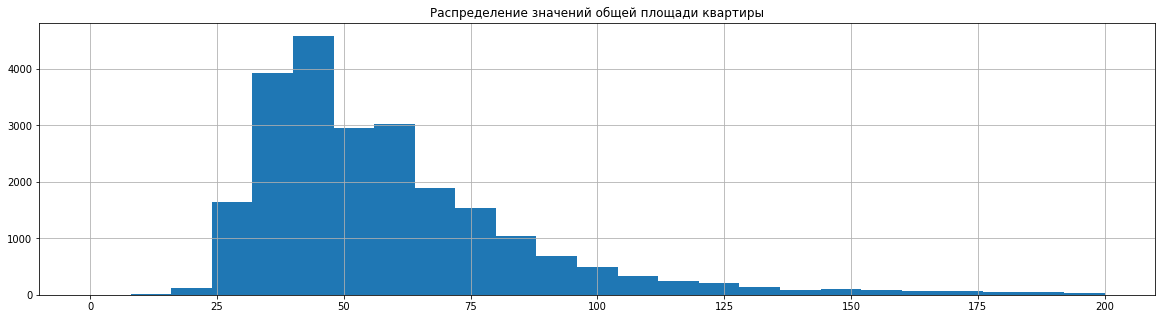

In [44]:
# построим гистограмму распределения значений общей площади квартиры
df['total_area_m2'].hist(bins = 25,  grid = True, range = (0, 200), figsize = (20, 5))
plt.title('Распределение значений общей площади квартиры')

Text(0.5, 1.0, 'Распределение значений цены квартиры')

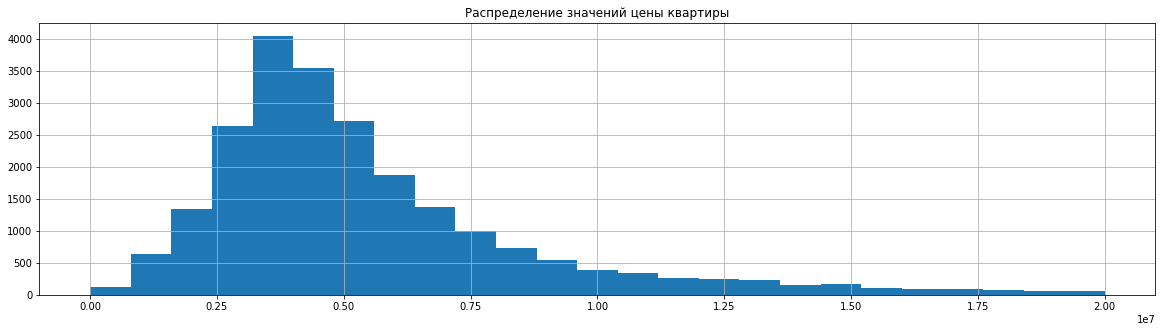

In [45]:
# построим гистограмму распределения значений цены квартиры
df['last_price'].hist(bins = 25,  grid = True, range = (0, 20000000), figsize = (20, 5))
plt.title('Распределение значений цены квартиры')

Text(0.5, 1.0, 'Распределение значений количества комнат в квартире')

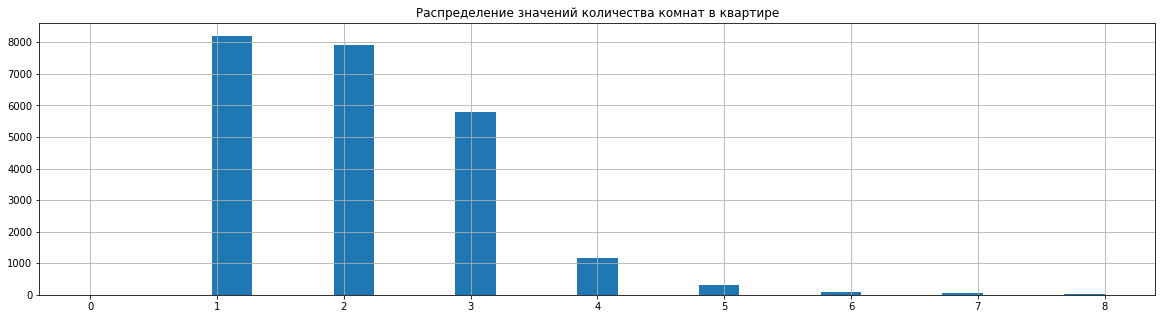

In [46]:
# построим гистограмму распределения значений количества комнат в квартире
df['rooms'].hist(bins = 25,  grid = True, range = (0, 8), figsize = (20, 5))
plt.title('Распределение значений количества комнат в квартире')

Text(0.5, 1.0, 'Распределение значений высоты потолков квартиры')

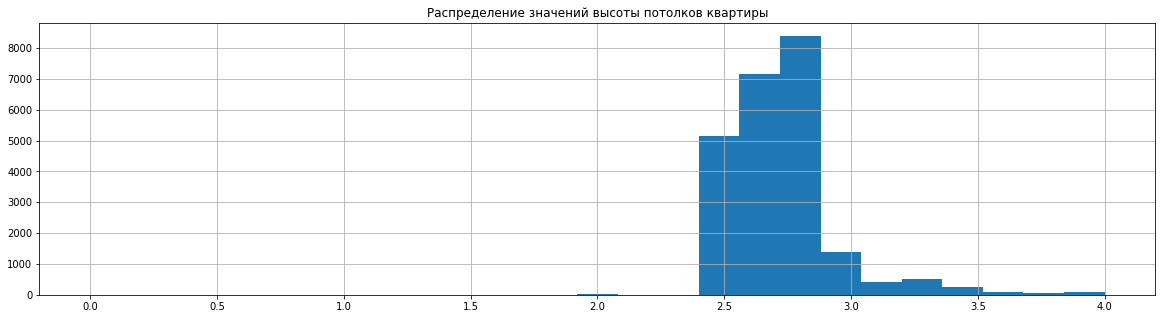

In [47]:
# построим гистограмму распределения значений высоты потолков квартиры
df['ceiling_height_m'].hist(bins = 25,  grid = True, range = (0, 4), figsize = (20, 5))
plt.title('Распределение значений высоты потолков квартиры')

### Вывод

Показатели общей площади, цены и количества комнат имеют большой разброс значений, что свидетельствует о наличии выбросов в данных параметрах.   
Типичная продаваемая квартира - это двухкомнатная квартира с общей площадью 52 квадратных метра, высотой потолков 2,7 метра, стоимостью 4,65 млн. рублей.   
Больше всего выставлено на продажу однокомнатных квартир, большинство продаваемых квартир с небольшой общей площадью (около 40 квадратных метров) и высотой потолков около 2,7 метров. Самая распространенная цена квартиры - около 4 млн. рублей. 

**Изучим время продажи квартиры.**

Text(0.5, 1.0, 'Распределение значений продолжительности размещения объявления')

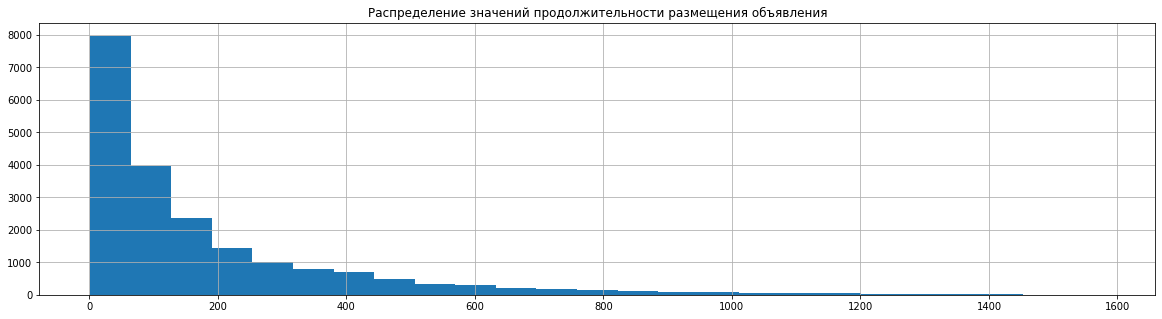

In [48]:
# построим гистограмму распределения значений продолжительности размещения объявления
df['days_exposition'].hist(bins = 25,  grid = True, figsize = (20, 5))
plt.title('Распределение значений продолжительности размещения объявления')

In [49]:
# посмотрим статистические данные продолжительности размещения объявления
df['days_exposition'].describe()

count   20,420.00
mean       180.90
std        219.75
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

Text(0.5, 1.0, 'Диаграмма значений продолжительности размещения объявления')

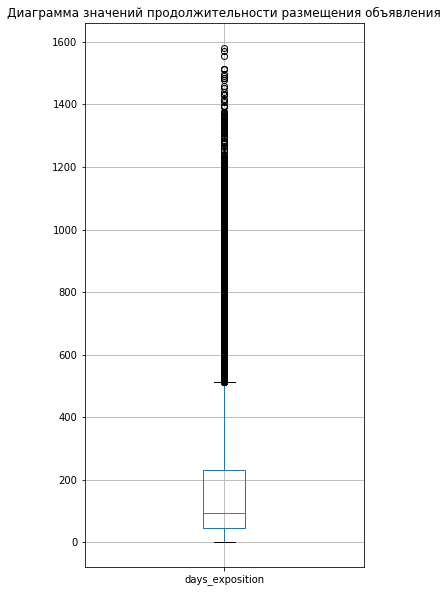

In [50]:
# построим диаграмму размаха значений продолжительности размещения объявления
df.boxplot(['days_exposition'], figsize = (5, 10))
plt.title('Диаграмма значений продолжительности размещения объявления')

### Вывод

Среднее время продажи квартиры составляет около 6 месяцев, тогда как медиана - чуть более 3 месяцев. Это свидетельствует о том, что есть квартиры, которые продаются очень долгое время (вплоть до 4 лет).   
Большинство квартир продается в течение 2 месяцев после публикации объявления.  
Быстрая продажа квартиры - это продажа в течение 45 дней (1,5 месяца), долгая - по истечении 232 дней (7,7 месяцев) после публикации объявления. Половина квартир продается в течение указанного диапазона.

**Уберем редкие и выбивающиеся значения.**

In [51]:
# создадим функцию для расчета значений, отклоняющихся от медианы на 1,5 межквартильных размаха
def filtered_data(column):
    q1 = column.quantile(0.25)                 
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    filtered = (column >= (q1 - 1.5 * iqr)) & (column <= (q3 + 1.5 * iqr))
    return filtered

In [52]:
# применим функцию для столбцов общей площади, цены квартиры, количества комнат и высоты потолков
total_area_m2_filtered = filtered_data(df['total_area_m2'])
last_price_filtered = filtered_data(df['last_price'])
rooms_filtered = filtered_data(df['rooms'])
ceiling_height_m_filtered = filtered_data(df['ceiling_height_m'])

In [53]:
# создадим DataFrame с данными по столбцам общей площади, цены квартиры, количества комнат и высоты потолков без выбросов
good_df = df.copy()
good_df.loc[~total_area_m2_filtered, 'total_area_m2'] = np.nan
good_df.loc[~last_price_filtered, 'last_price'] = np.nan
good_df.loc[~rooms_filtered, 'rooms'] = np.nan
good_df.loc[~ceiling_height_m_filtered, 'ceiling_height_m'] = np.nan
good_df = good_df[total_area_m2_filtered | last_price_filtered | rooms_filtered | ceiling_height_m_filtered]
good_df.head()

locality_name  total_area_m2  living_area_m2  ratio_living_total_area  \
0  Санкт-Петербург         108.00           51.00                     0.47   
1   поселок Шушары          40.40           18.60                     0.46   
2  Санкт-Петербург          56.00           34.30                     0.61   
3  Санкт-Петербург            nan           91.73                     0.58   
4  Санкт-Петербург         100.00           32.00                     0.32   

   kitchen_area_m2  ratio_kitchen_total_area  ceiling_height_m  rooms  \
0            25.00                      0.23              2.70   3.00   
1            11.00                      0.27              2.64   1.00   
2             8.30                      0.15              2.76   2.00   
3            27.82                      0.17              2.76   3.00   
4            41.00                      0.41               nan   2.00   

   number_of_balconies  floor type_of_floor  total_floors_in_house  is_studio  \
0                    0      8        другой                     16      False   
1                    2      1        первый                     11      False   
2                    0      4        другой                      5      False   
3                    0      9        другой                     14      False   
4                    0     13        другой                     14      False   

   is_open_plan  is_apartment  total_images    last_price  price_per_meter2  \
0         False         False            20           nan            120370   
1         False         False             7  3,350,000.00             82920   
2         False         False            10  5,196,000.00             92785   
3         False         False             0           nan            408176   
4         False         False             2 10,000,000.00            100000   

  first_day_exposition day_of_week_exposition month_exposition  \
0           2019-03-07               Thursday            March   
1           2018-12-04                Tuesday         December   
2           2015-08-20               Thursday           August   
3           2015-07-24                 Friday             July   
4           2018-06-19                Tuesday             June   

   year_exposition  days_exposition  distance_city_center__m  \
0             2019              nan                16,028.00   
1             2018            81.00                18,603.00   
2             2015           558.00                13,933.00   
3             2015           424.00                 6,800.00   
4             2018           121.00                 8,098.00   

   distance_nearest_airport__m  number_of_parks__within_3km  \
0                    18,863.00                         1.00   
1                    12,817.00                         0.00   
2                    21,741.00                         1.00   
3                    28,098.00                         2.00   
4                    31,856.00                         2.00   

   distance_nearest_park__m  number_of_ponds__within_3km  \
0                    482.00                         2.00   
1                       nan                         0.00   
2                     90.00                         2.00   
3                     84.00                         3.00   
4                    112.00                         1.00   

   distance_nearest_pond__m  
0                    755.00  
1                       nan  
2                    574.00  
3                    234.00  
4                     48.00

In [54]:
# сохраним статистические данные общей площади, цены квартиры, количества комнат и высоты потолков по отфильтрованной таблице
# в переменной 'stat_filtred'
stat_filtred = good_df[['total_area_m2', 'last_price', 'rooms', 'ceiling_height_m']].describe()
stat_filtred

total_area_m2    last_price     rooms  ceiling_height_m
count      22,354.00     21,570.00 23,501.00         22,060.00
mean           54.35  4,848,636.70      2.06              2.68
std            19.36  2,230,621.20      0.99              0.13
min            12.00     12,190.00      1.00              2.40
25%            39.40  3,300,000.00      1.00              2.57
50%            50.10  4,400,000.00      2.00              2.70
75%            65.60  6,000,000.00      3.00              2.76
max           114.50 11,900,000.00      6.00              3.01

In [55]:
# объединим статистические данные общей площади, цены квартиры, количества комнат и высоты потолков по отфильтрованной и 
# исходной таблицам
stat_all = stat.join(stat_filtred, rsuffix = '_filtred')
stat_all = stat_all[['total_area_m2',
                     'total_area_m2_filtred',
                     'last_price',
                     'last_price_filtred',
                     'rooms',
                     'rooms_filtred',
                     'ceiling_height_m',
                     'ceiling_height_m_filtred']]
stat_all

total_area_m2  total_area_m2_filtred     last_price  \
count      23,591.00              22,354.00      23,591.00   
mean           60.34                  54.35   6,542,233.26   
std            35.65                  19.36  10,906,303.99   
min            12.00                  12.00      12,190.00   
25%            40.00                  39.40   3,400,000.00   
50%            52.00                  50.10   4,650,000.00   
75%            69.80                  65.60   6,800,000.00   
max           900.00                 114.50 763,000,000.00   

       last_price_filtred     rooms  rooms_filtred  ceiling_height_m  \
count           21,570.00 23,591.00      23,501.00         23,591.00   
mean         4,848,636.70      2.08           2.06              2.72   
std          2,230,621.20      1.07           0.99              0.22   
min             12,190.00      1.00           1.00              2.00   
25%          3,300,000.00      1.00           1.00              2.60   
50%          4,400,000.00      2.00           2.00              2.70   
75%          6,000,000.00      3.00           3.00              2.76   
max         11,900,000.00     19.00           6.00              6.00   

       ceiling_height_m_filtred  
count                 22,060.00  
mean                       2.68  
std                        0.13  
min                        2.40  
25%                        2.57  
50%                        2.70  
75%                        2.76  
max                        3.01

Text(0.5, 1.0, 'Распределение значений общей площади квартиры')

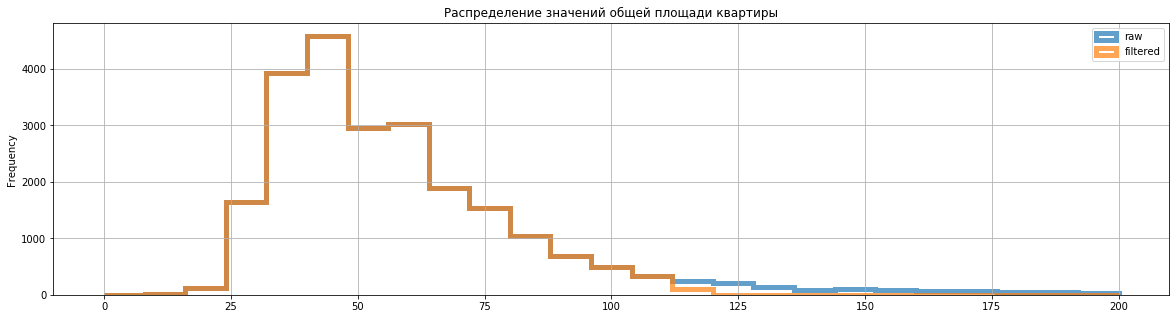

In [56]:
# построим гистограмму распределения значений общей площади квартиры по отфильтрованной и исходной таблицам
ax = df.plot(kind = 'hist', y = 'total_area_m2', histtype = 'step',  bins = 25, range = (0, 200),
             linewidth = 5, alpha = 0.7, label = 'raw')
good_df.plot(kind = 'hist', y = 'total_area_m2', histtype = 'step',  bins = 25, range = (0, 200), linewidth = 5, alpha = 0.7,
             figsize = (20, 5), label = 'filtered', ax = ax, grid = True, legend = True)
plt.title('Распределение значений общей площади квартиры')

Text(0.5, 1.0, 'Распределение значений цены квартиры')

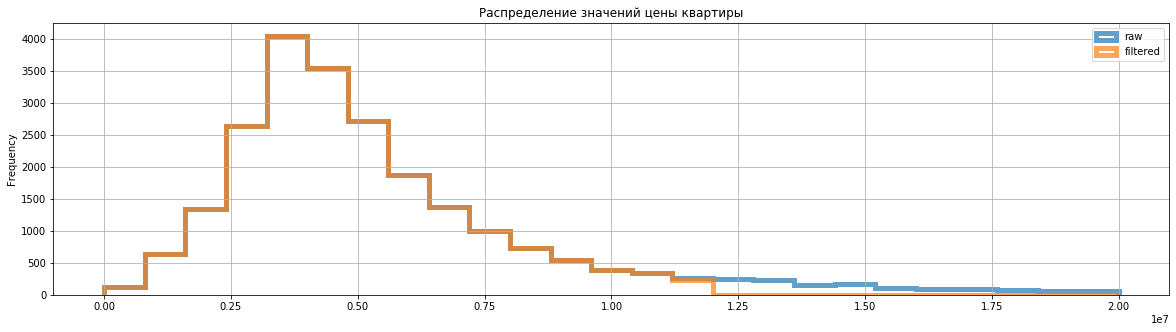

In [57]:
# построим гистограмму распределения значений цены квартиры по отфильтрованной и исходной таблицам
ax = df.plot(kind = 'hist', y = 'last_price', histtype = 'step',  bins = 25, range = (0, 20000000),
             linewidth = 5, alpha = 0.7, label = 'raw')
good_df.plot(kind = 'hist', y = 'last_price', histtype = 'step',  bins = 25, range = (0, 20000000), linewidth = 5,
             alpha = 0.7, figsize = (20, 5), label = 'filtered', ax = ax, grid = True, legend = True)
plt.title('Распределение значений цены квартиры')

Text(0.5, 1.0, 'Распределение значений количества комнат в квартире')

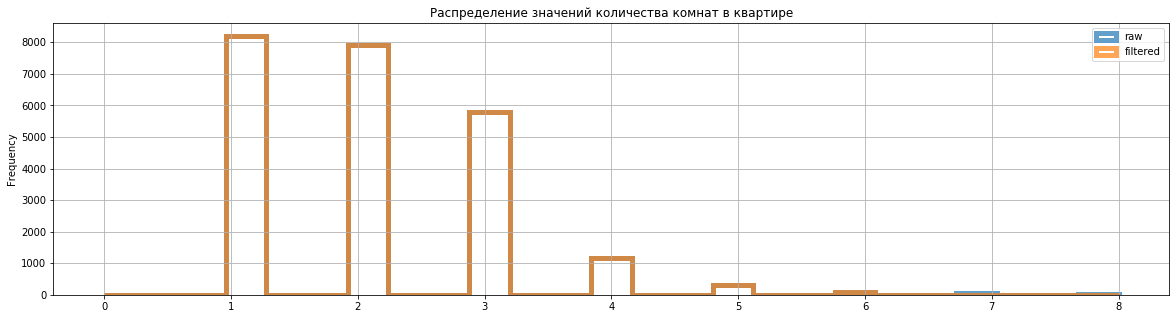

In [58]:
# построим гистограмму распределения значений количества комнат в квартире по отфильтрованной и исходной таблицам
ax = df.plot(kind = 'hist', y = 'rooms', histtype = 'step',  bins = 25, range = (0, 8),
             linewidth = 5, alpha = 0.7, label = 'raw')
good_df.plot(kind = 'hist', y = 'rooms', histtype = 'step',  bins = 25, range = (0, 8), linewidth = 5,
             alpha = 0.7, figsize = (20, 5), label = 'filtered', ax = ax, grid = True, legend = True)
plt.title('Распределение значений количества комнат в квартире')

Text(0.5, 1.0, 'Распределение значений высоты потолков квартиры')

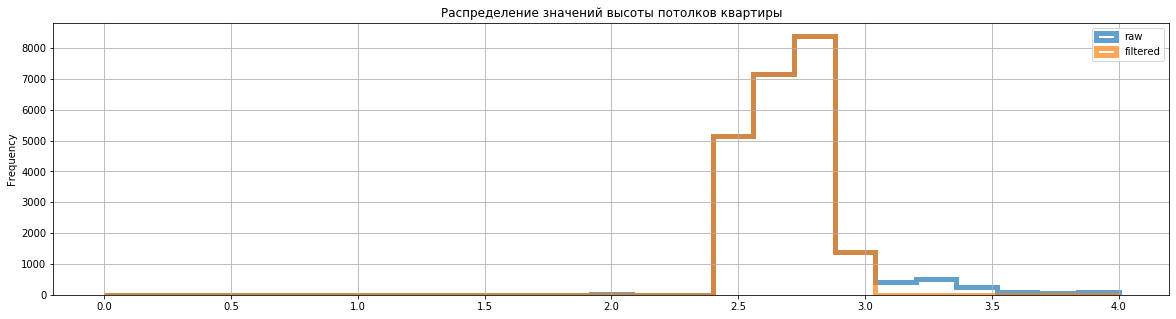

In [59]:
# построим гистограмму распределения значений высоты потолков квартиры по отфильтрованной и исходной таблицам
ax = df.plot(kind = 'hist', y = 'ceiling_height_m', histtype = 'step',  bins = 25, range = (0, 4),
             linewidth = 5, alpha = 0.7, label = 'raw')
good_df.plot(kind = 'hist', y = 'ceiling_height_m', histtype = 'step',  bins = 25, range = (0, 4), linewidth = 5,
             alpha = 0.7, figsize = (20, 5), label = 'filtered', ax = ax, grid = True, legend = True)
plt.title('Распределение значений высоты потолков квартиры')

### Вывод

Для выявления редких и выбивающихся значений общей площади, цены квартиры, количества комнат и высоты потолков создали функцию для определения значений, отклоняющихся от медианы на 1,5 межквартильных размаха. Применив ее, получили новый DataFrame без выбросов в значениях по указанным столбцам.  
Сравнив статистические данные по исходной и отфильтрованной таблицам следует отметить, что по всем измененным столбцам уменьшилось стандартное отклонение, при этом по показателям общей площади и цены квартиры значительно.   
По построенным графикам заметно, что по всем измененным параметрам были удалены "хвосты" аномально больших значений.   
Далее анализ будем проводить по отфильтрованной таблице.

**Изучим зависимость цены квартиры от ее общей площади, числа комнат, удалённости от центра, от того, на каком этаже расположена квартира: первом, последнем или другом, от даты размещения: дня недели, месяца и года.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee1efac1d0>,
      dtype=object)

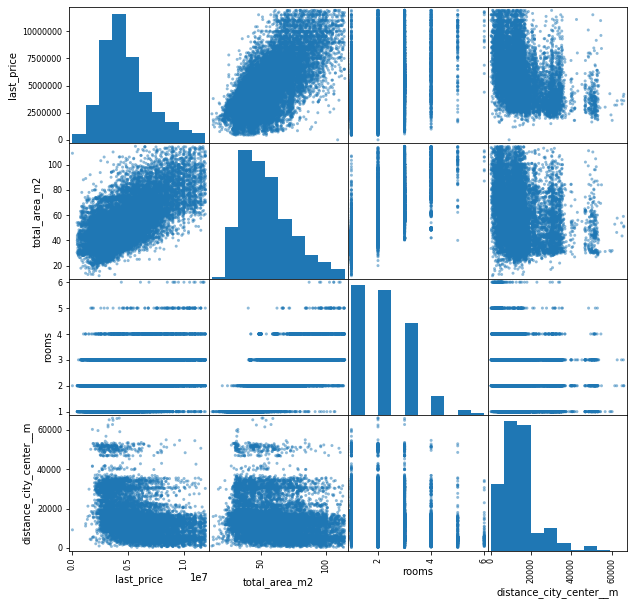

In [60]:
# построим матрицу рассеяния по значениям цены квартиры, общей площади, количества комнат и расстояния до центра города
pd.plotting.scatter_matrix(good_df[['last_price', 'total_area_m2', 'rooms', 'distance_city_center__m']], figsize = (10, 10))

In [61]:
# рассчитаем коэффициенты корреляции значений цены квартиры, общей площади, количества комнат и расстояния до центра города
corr_filtred = good_df[['last_price', 'total_area_m2', 'rooms', 'distance_city_center__m']].corr().round(2)
corr_filtred.style.background_gradient(cmap = 'coolwarm')

In [62]:
# рассчитаем коэффициенты корреляции значений цены квадратного метра, общей площади, количества комнат и 
# расстояния до центра города
corr_filtred = good_df[['price_per_meter2', 'total_area_m2', 'rooms', 'distance_city_center__m']].corr().round(2)
corr_filtred.style.background_gradient(cmap = 'coolwarm')

Text(0.5, 1.0, 'Диаграмма зависимости цены квартиры от этажа')

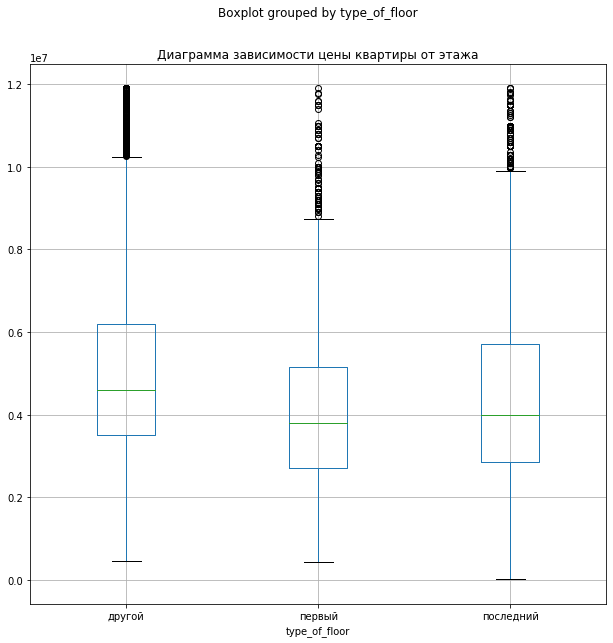

In [63]:
# построим диаграмму размаха зависимости цены квартиры от этажа
good_df.boxplot('last_price', by = 'type_of_floor',figsize=(10, 10))
plt.title('Диаграмма зависимости цены квартиры от этажа')

Text(0.5, 1.0, 'Диаграмма зависимости цены квартиры от дня недели подачи объявления')

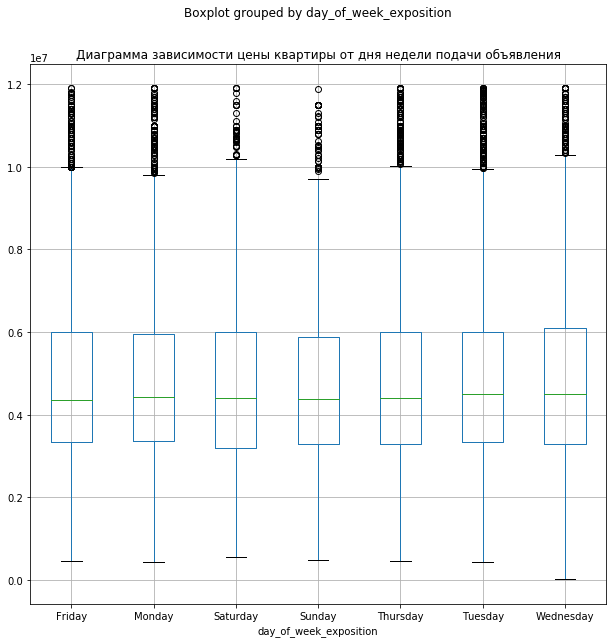

In [64]:
# построим диаграмму размаха зависимости цены квартиры от дня недели подачи объявления
good_df.boxplot('last_price', by = 'day_of_week_exposition',figsize=(10, 10))
plt.title('Диаграмма зависимости цены квартиры от дня недели подачи объявления')

Text(0.5, 1.0, 'Диаграмма зависимости цены квартиры от месяца подачи объявления')

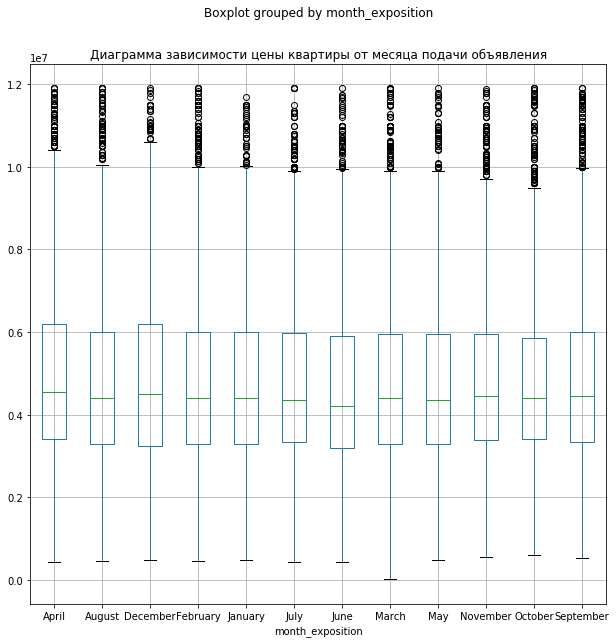

In [65]:
# построим диаграмму размаха зависимости цены квартиры от месяца подачи объявления
good_df.boxplot('last_price', by = 'month_exposition',figsize=(10, 10))
plt.title('Диаграмма зависимости цены квартиры от месяца подачи объявления')

Text(0.5, 1.0, 'Диаграмма зависимости цены квартиры от года подачи объявления')

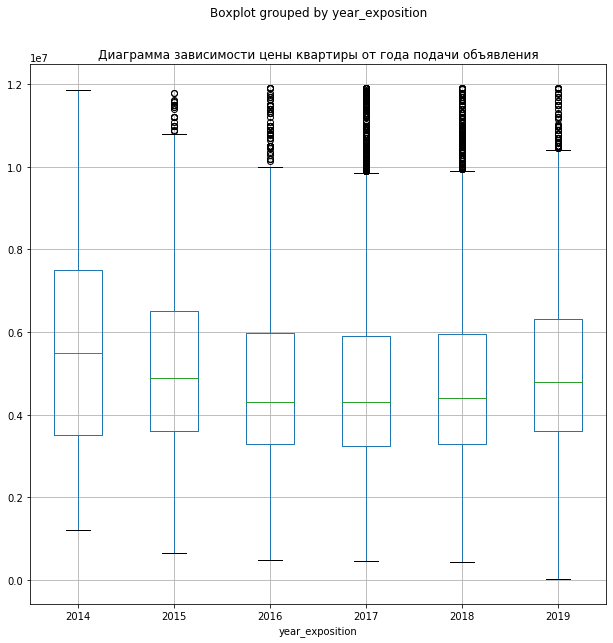

In [66]:
# построим диаграмму размаха зависимости цены квартиры от года подачи объявления
good_df.boxplot('last_price', by = 'year_exposition',figsize=(10, 10))
plt.title('Диаграмма зависимости цены квартиры от года подачи объявления')

### Вывод

Цена квартиры находится в прямой зависимости от ее общей площади и числа комнат, что весьма логично - чем больше квартира, тем она дороже. В то же время на цену квадратного метра количество комнат практически не влияет, а общая площадь квартиры влияет незначительно. И на цену квартиры, и на цену квадратного метра достаточно сильно влияет удалённость от центра города - чем квартира дальше от центра, тем она дешевле.   
Дороже всего квартиры, которые находятся ни на первом, ни на последнем этаже, самые дешевые - на первом этаже.   
Цена квартиры ни от дня недели, ни от месяца размещения объявления не зависят. В то же время заметна тенденция снижения стоимости жилья после 2014 года. При этом, хоть в 2019 году цены несколько выросли, однако уровня 2014 года еще не достигли.

**Выберем 10 населённых пунктов с наибольшим числом объявлений, проанализируем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.**

In [67]:
# выделим 10 населенных пунктов с максимальным количеством объявлений
top_locality_name = good_df.pivot_table(index = 'locality_name', values = 'price_per_meter2', aggfunc = ('count', 'mean'))\
                                                    .sort_values(by = 'count', ascending = False).head(10)
top_locality_name

count       mean
locality_name                         
Санкт-Петербург   15,628.00 114,780.75
поселок Мурино       552.00  85,629.11
поселок Шушары       439.00  78,550.88
Всеволожск           398.00  68,654.01
Пушкин               369.00 103,125.37
Колпино              338.00  75,424.15
поселок Парголово    327.00  90,175.49
Гатчина              307.00  68,745.69
деревня Кудрово      299.00  92,473.09
Выборг               237.00  58,141.49

In [68]:
# создадим список из 10 населенных пунктов с максимальным количеством объявлений
top_list = top_locality_name.reset_index().locality_name.to_list()
top_list

['Санкт-Петербург',
 'поселок Мурино',
 'поселок Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'поселок Парголово',
 'Гатчина',
 'деревня Кудрово',
 'Выборг']

In [69]:
# создадим столбец, в котором населенные пункты, не входящие в 10 населенных пунктов с максимальным
# количеством объявлений, включим в группировку 'Другой' 
good_df['group_locality_name'] = (good_df['locality_name'].where(good_df['locality_name'].isin(top_list), 'Другой'))
good_df.tail()

locality_name  total_area_m2  living_area_m2  \
23586      Санкт-Петербург            nan           73.30   
23587                Тосно          59.00           38.00   
23588  деревня Рождествено          56.70           29.70   
23589      Санкт-Петербург          76.75           44.28   
23590  поселок Новый Учхоз          32.30           12.30   

       ratio_living_total_area  kitchen_area_m2  ratio_kitchen_total_area  \
23586                     0.55            13.83                      0.10   
23587                     0.64             8.50                      0.14   
23588                     0.52             9.92                      0.17   
23589                     0.58            23.30                      0.30   
23590                     0.38             9.00                      0.28   

       ceiling_height_m  rooms  number_of_balconies  floor type_of_floor  \
23586               nan   3.00                    0      3        другой   
23587              2.54   3.00                    0      4        другой   
23588              2.64   2.00                    0      1        первый   
23589              3.00   2.00                    2     12        другой   
23590              2.50   1.00                    0      1        первый   

       total_floors_in_house  is_studio  is_open_plan  is_apartment  \
23586                      5      False         False         False   
23587                      5      False         False         False   
23588                      3      False         False         False   
23589                     17      False         False         False   
23590                      5      False         False         False   

       total_images    last_price  price_per_meter2 first_day_exposition  \
23586             9  9,700,000.00             72490           2017-03-21   
23587            14  3,100,000.00             52542           2018-01-15   
23588            18  2,500,000.00             44091           2018-02-11   
23589            13 11,475,000.00            149511           2017-03-28   
23590             4  1,350,000.00             41795           2017-07-21   

      day_of_week_exposition month_exposition  year_exposition  \
23586                Tuesday            March             2017   
23587                 Monday          January             2018   
23588                 Sunday         February             2018   
23589                Tuesday            March             2017   
23590                 Friday             July             2017   

       days_exposition  distance_city_center__m  distance_nearest_airport__m  \
23586              nan                 4,232.00                    24,665.00   
23587            45.00                      nan                          nan   
23588              nan                      nan                          nan   
23589           602.00                10,364.00                    39,140.00   
23590              nan                      nan                          nan   

       number_of_parks__within_3km  distance_nearest_park__m  \
23586                         1.00                    796.00   
23587                          nan                       nan   
23588                          nan                       nan   
23589                         2.00                    173.00   
23590                          nan                       nan   

       number_of_ponds__within_3km  distance_nearest_pond__m  \
23586                         3.00                    381.00   
23587                          nan                       nan   
23588                          nan                       nan   
23589                         3.00                    196.00   
23590                          nan                       nan   

      group_locality_name  
23586     Санкт-Петербург  
23587              Другой  
23588              Другой  
23589     Санкт-Петербург  
23590              Другой

In [70]:
# создадим сводную таблицу с группировкой по названию населенного пункта, переименуем в ней столбцы и добавим столбец с долей
# количества объявлений
top_group_locality_name = good_df.pivot_table(index = 'group_locality_name', values = 'price_per_meter2',\
                                         aggfunc = ('count', 'mean')).sort_values(by = 'count', ascending = False)
top_group_locality_name = top_group_locality_name.rename(columns = {'count' : 'number_of_ads', 'mean' : 'price_per_meter2'})
top_group_locality_name['ratio_ads'] = top_group_locality_name['number_of_ads'] / top_group_locality_name['number_of_ads'].sum()
top_group_locality_name

number_of_ads  price_per_meter2  ratio_ads
group_locality_name                                            
Санкт-Петербург          15,628.00        114,780.75       0.66
Другой                    4,647.00         60,244.32       0.20
поселок Мурино              552.00         85,629.11       0.02
поселок Шушары              439.00         78,550.88       0.02
Всеволожск                  398.00         68,654.01       0.02
Пушкин                      369.00        103,125.37       0.02
Колпино                     338.00         75,424.15       0.01
поселок Парголово           327.00         90,175.49       0.01
Гатчина                     307.00         68,745.69       0.01
деревня Кудрово             299.00         92,473.09       0.01
Выборг                      237.00         58,141.49       0.01

In [71]:
# отсортируем таблицу по средней цене квадратного метра
top_group_locality_name.sort_values(by = 'price_per_meter2', ascending = False)

number_of_ads  price_per_meter2  ratio_ads
group_locality_name                                            
Санкт-Петербург          15,628.00        114,780.75       0.66
Пушкин                      369.00        103,125.37       0.02
деревня Кудрово             299.00         92,473.09       0.01
поселок Парголово           327.00         90,175.49       0.01
поселок Мурино              552.00         85,629.11       0.02
поселок Шушары              439.00         78,550.88       0.02
Колпино                     338.00         75,424.15       0.01
Гатчина                     307.00         68,745.69       0.01
Всеволожск                  398.00         68,654.01       0.02
Другой                    4,647.00         60,244.32       0.20
Выборг                      237.00         58,141.49       0.01

Text(0.5, 1.0, 'Зависимость средней цены квадратного метра от населённого пункта')

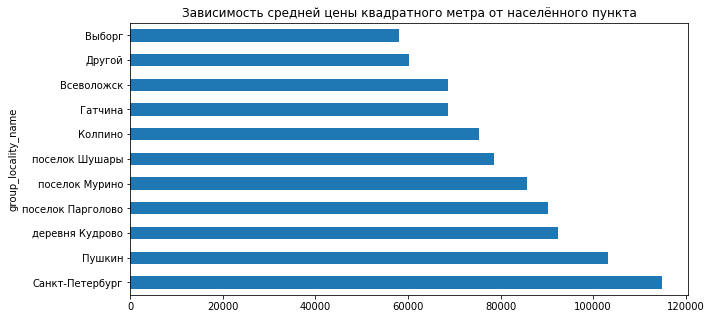

In [72]:
# построим диаграмму зависимости средней цены квадратного метра от населённого пункта
top_group_locality_name.sort_values(by = 'price_per_meter2', ascending = False)['price_per_meter2']\
                                                                   .plot(kind = 'barh', figsize = (10, 5))
plt.title('Зависимость средней цены квадратного метра от населённого пункта')

### Вывод

Выбрав 10 населенных пунктов с наибольшим количеством объявлений, чтобы не терять всю имеющуюся информацию, все остальные населенные пункты отнесли к категории "Другой". Наибольшее количество объявлений (66%) представлено по Санкт-Петербургу. Доля всех других населенных пунктов в нашей информации составляет не более 2%.   
Наибольшая средняя цена квадратного метра в Санкт-Петербурге (около 115 тысяч рублей), наименьшая  - в Выборге (около 58 тысяч рублей). Стоимость жилья в Санкт-Петербурге почти в 2 раза выше стоимости жилья в населенных пунктах, не вошедших  в топ-10 с наибольшим количеством объявлений.

**Выделим квартиры в Санкт-Петербурге, выясним, какая область входит в центр. Проанализируем зависимость цены квартиры от удалённости от центра. Определим границу центральной зоны Санкт-Петербурга.**

In [73]:
# выделим информацию по Санкт-Петербургу
good_df_saint_petersburg = good_df.query('locality_name == "Санкт-Петербург"')
good_df_saint_petersburg.head()

locality_name  total_area_m2  living_area_m2  ratio_living_total_area  \
0  Санкт-Петербург         108.00           51.00                     0.47   
2  Санкт-Петербург          56.00           34.30                     0.61   
3  Санкт-Петербург            nan           91.73                     0.58   
4  Санкт-Петербург         100.00           32.00                     0.32   
7  Санкт-Петербург          71.60           41.31                     0.58   

   kitchen_area_m2  ratio_kitchen_total_area  ceiling_height_m  rooms  \
0            25.00                      0.23              2.70   3.00   
2             8.30                      0.15              2.76   2.00   
3            27.82                      0.17              2.76   3.00   
4            41.00                      0.41               nan   2.00   
7            18.90                      0.26              2.76   2.00   

   number_of_balconies  floor type_of_floor  total_floors_in_house  is_studio  \
0                    0      8        другой                     16      False   
2                    0      4        другой                      5      False   
3                    0      9        другой                     14      False   
4                    0     13        другой                     14      False   
7                    2     22        другой                     24      False   

   is_open_plan  is_apartment  total_images    last_price  price_per_meter2  \
0         False         False            20           nan            120370   
2         False         False            10  5,196,000.00             92785   
3         False         False             0           nan            408176   
4         False         False             2 10,000,000.00            100000   
7         False         False             5  7,915,000.00            110544   

  first_day_exposition day_of_week_exposition month_exposition  \
0           2019-03-07               Thursday            March   
2           2015-08-20               Thursday           August   
3           2015-07-24                 Friday             July   
4           2018-06-19                Tuesday             June   
7           2019-04-18               Thursday            April   

   year_exposition  days_exposition  distance_city_center__m  \
0             2019              nan                16,028.00   
2             2015           558.00                13,933.00   
3             2015           424.00                 6,800.00   
4             2018           121.00                 8,098.00   
7             2019              nan                11,634.00   

   distance_nearest_airport__m  number_of_parks__within_3km  \
0                    18,863.00                         1.00   
2                    21,741.00                         1.00   
3                    28,098.00                         2.00   
4                    31,856.00                         2.00   
7                    23,982.00                         0.00   

   distance_nearest_park__m  number_of_ponds__within_3km  \
0                    482.00                         2.00   
2                     90.00                         2.00   
3                     84.00                         3.00   
4                    112.00                         1.00   
7                       nan                         0.00   

   distance_nearest_pond__m group_locality_name  
0                    755.00     Санкт-Петербург  
2                    574.00     Санкт-Петербург  
3                    234.00     Санкт-Петербург  
4                     48.00     Санкт-Петербург  
7                       nan     Санкт-Петербург

In [74]:
# добавим в таблицу столбец расстояния до центра города в километрах
good_df_saint_petersburg['distance_city_center__km'] = (good_df_saint_petersburg['distance_city_center__m'] / 1000).round(0)
good_df_saint_petersburg.head()

locality_name  total_area_m2  living_area_m2  ratio_living_total_area  \
0  Санкт-Петербург         108.00           51.00                     0.47   
2  Санкт-Петербург          56.00           34.30                     0.61   
3  Санкт-Петербург            nan           91.73                     0.58   
4  Санкт-Петербург         100.00           32.00                     0.32   
7  Санкт-Петербург          71.60           41.31                     0.58   

   kitchen_area_m2  ratio_kitchen_total_area  ceiling_height_m  rooms  \
0            25.00                      0.23              2.70   3.00   
2             8.30                      0.15              2.76   2.00   
3            27.82                      0.17              2.76   3.00   
4            41.00                      0.41               nan   2.00   
7            18.90                      0.26              2.76   2.00   

   number_of_balconies  floor type_of_floor  total_floors_in_house  is_studio  \
0                    0      8        другой                     16      False   
2                    0      4        другой                      5      False   
3                    0      9        другой                     14      False   
4                    0     13        другой                     14      False   
7                    2     22        другой                     24      False   

   is_open_plan  is_apartment  total_images    last_price  price_per_meter2  \
0         False         False            20           nan            120370   
2         False         False            10  5,196,000.00             92785   
3         False         False             0           nan            408176   
4         False         False             2 10,000,000.00            100000   
7         False         False             5  7,915,000.00            110544   

  first_day_exposition day_of_week_exposition month_exposition  \
0           2019-03-07               Thursday            March   
2           2015-08-20               Thursday           August   
3           2015-07-24                 Friday             July   
4           2018-06-19                Tuesday             June   
7           2019-04-18               Thursday            April   

   year_exposition  days_exposition  distance_city_center__m  \
0             2019              nan                16,028.00   
2             2015           558.00                13,933.00   
3             2015           424.00                 6,800.00   
4             2018           121.00                 8,098.00   
7             2019              nan                11,634.00   

   distance_nearest_airport__m  number_of_parks__within_3km  \
0                    18,863.00                         1.00   
2                    21,741.00                         1.00   
3                    28,098.00                         2.00   
4                    31,856.00                         2.00   
7                    23,982.00                         0.00   

   distance_nearest_park__m  number_of_ponds__within_3km  \
0                    482.00                         2.00   
2                     90.00                         2.00   
3                     84.00                         3.00   
4                    112.00                         1.00   
7                       nan                         0.00   

   distance_nearest_pond__m group_locality_name  distance_city_center__km  
0                    755.00     Санкт-Петербург                     16.00  
2                    574.00     Санкт-Петербург                     14.00  
3                    234.00     Санкт-Петербург                      7.00  
4                     48.00     Санкт-Петербург                      8.00  
7                       nan     Санкт-Петербург                     12.00

In [75]:
# создадим сводную таблицу с группировкой по расстоянию до центра города, переименуем в ней столбцы
group_saint_petersburg = good_df_saint_petersburg.pivot_table(index = 'distance_city_center__km', values = 'last_price',\
                                                          aggfunc = ('count', 'mean'))
group_saint_petersburg = group_saint_petersburg.rename(columns = {'count' : 'number_of_ads', 'mean' : 'price_for_float'})
group_saint_petersburg.head(10)

number_of_ads  price_for_float
distance_city_center__km                                
0.00                                 10     8,398,000.00
1.00                                103     8,218,184.46
2.00                                181     7,970,519.34
3.00                                251     7,382,871.31
4.00                                472     7,632,777.29
5.00                                599     7,654,870.77
6.00                                411     7,119,892.65
7.00                                288     6,671,881.39
8.00                                469     6,589,046.52
9.00                                528     5,569,104.61

Text(0.5, 1.0, 'Зависимость средней цены квартиры от расстояния до центра города')

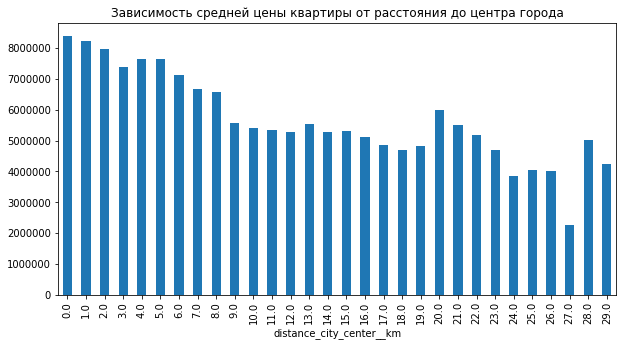

In [76]:
# построим диаграмму зависимости средней цены квартиры от расстояния до центра города
group_saint_petersburg['price_for_float'].plot(kind = 'bar', figsize = (10, 5))
plt.title('Зависимость средней цены квартиры от расстояния до центра города')

### Вывод

Самая высокая средняя цена квартиры в самом центре Санкт-Петербурга (почти 8,4 млн.рублей), при этом чем расстояние от центра дальше, тем цена ниже.
Границу центральной зоны Санкт-Петербурга определим в 5 километров.

**Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: общая площадь, цена, число комнат, высота потолков. Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата публикации объявления). Полученные выводы сравним с выводами по всему городу.**

In [77]:
# выделим информацию с расстоянием до центра города менее 5 км
good_df_center_saint_petersburg = good_df_saint_petersburg.query('distance_city_center__km <= 5')
good_df_center_saint_petersburg.head()

locality_name  total_area_m2  living_area_m2  ratio_living_total_area  \
24  Санкт-Петербург          97.20           46.50                     0.48   
35  Санкт-Петербург            nan          104.00                     0.70   
61  Санкт-Петербург          74.00           43.00                     0.58   
63  Санкт-Петербург            nan           68.00                     0.58   
99  Санкт-Петербург          90.00           67.00                     0.74   

    kitchen_area_m2  ratio_kitchen_total_area  ceiling_height_m  rooms  \
24            19.60                      0.20              2.76   2.00   
35            17.00                      0.11              2.76   5.00   
61            20.00                      0.27              2.76   2.00   
63            16.00                      0.14              3.00   3.00   
99             8.00                      0.09              2.76   4.00   

    number_of_balconies  floor type_of_floor  total_floors_in_house  \
24                    0      1        первый                      3   
35                    0      4        другой                      5   
61                    0      4     последний                      4   
63                    0      7        другой                      9   
99                    0      2        другой                      5   

    is_studio  is_open_plan  is_apartment  total_images   last_price  \
24      False         False         False             8 6,500,000.00   
35      False         False         False             6          nan   
61      False         False         False            18 7,990,000.00   
63      False         False         False             2          nan   
99      False         False         False            32 9,600,000.00   

    price_per_meter2 first_day_exposition day_of_week_exposition  \
24             66872           2015-10-31               Saturday   
35            104026           2017-06-26                 Monday   
61            107972           2017-08-24               Thursday   
63            169491           2018-09-11                Tuesday   
99            106666           2017-09-26                Tuesday   

   month_exposition  year_exposition  days_exposition  \
24          October             2015           265.00   
35             June             2017           644.00   
61           August             2017           609.00   
63        September             2018            37.00   
99        September             2017           104.00   

    distance_city_center__m  distance_nearest_airport__m  \
24                 2,336.00                    20,052.00   
35                 3,502.00                    23,670.00   
61                 4,288.00                    22,568.00   
63                 4,800.00                    26,055.00   
99                 2,818.00                    23,277.00   

    number_of_parks__within_3km  distance_nearest_park__m  \
24                         3.00                    411.00   
35                         0.00                       nan   
61                         1.00                    363.00   
63                         1.00                    648.00   
99                         0.00                       nan   

    number_of_ponds__within_3km  distance_nearest_pond__m group_locality_name  \
24                         3.00                    124.00     Санкт-Петербург   
35                         1.00                    779.00     Санкт-Петербург   
61                         0.00                       nan     Санкт-Петербург   
63                         1.00                    779.00     Санкт-Петербург   
99                         0.00                       nan     Санкт-Петербург   

    distance_city_center__km  
24                      2.00  
35                      4.00  
61                      4.00  
63                      5.00  
99                      3.00

Text(0.5, 1.0, 'Распределение значений общей площади квартиры по центру Санкт-Петербурга')

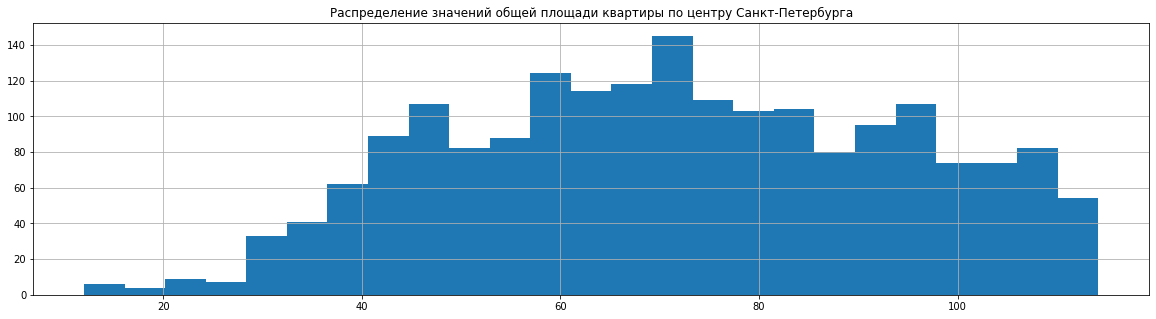

In [78]:
# построим гистограмму распределения значений общей площади квартиры по центру Санкт-Петербурга
good_df_center_saint_petersburg['total_area_m2'].hist(bins = 25,  grid = True, figsize = (20, 5))
plt.title('Распределение значений общей площади квартиры по центру Санкт-Петербурга')

Text(0.5, 1.0, 'Распределение значений цены квартиры по центру Санкт-Петербурга')

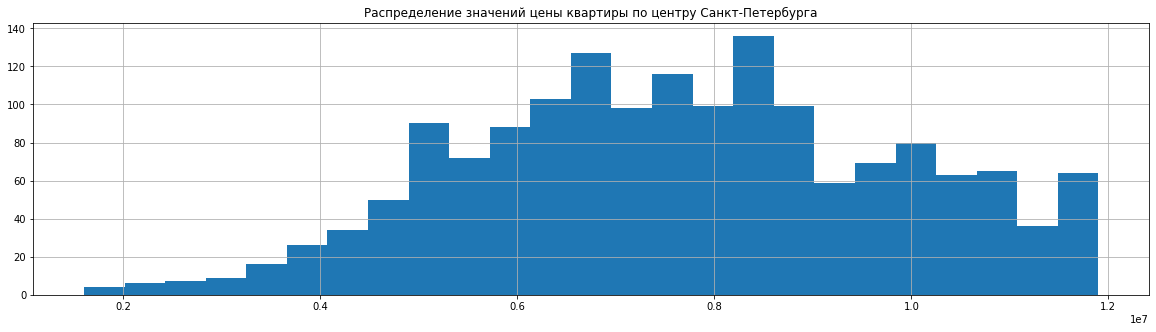

In [79]:
# построим гистограмму распределения значений цены квартиры по центру Санкт-Петербурга
good_df_center_saint_petersburg['last_price'].hist(bins = 25,  grid = True, figsize = (20, 5))
plt.title('Распределение значений цены квартиры по центру Санкт-Петербурга')

Text(0.5, 1.0, 'Распределение значений количества комнат в квартире по центру Санкт-Петербурга')

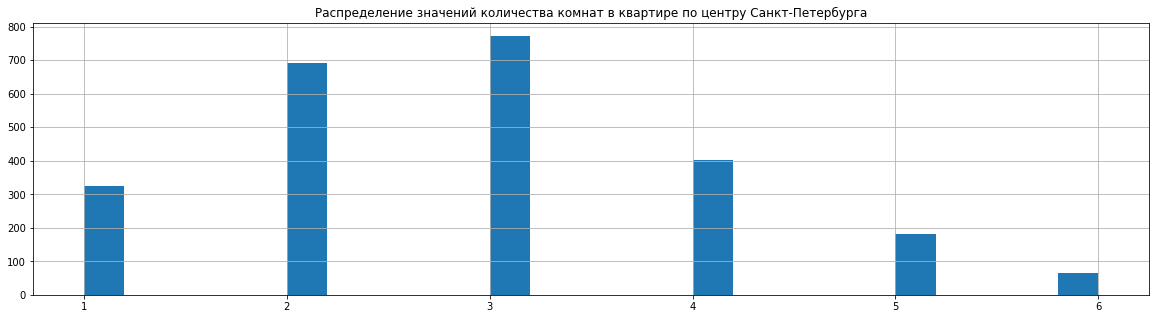

In [80]:
# построим гистограмму распределения значений количества комнат в квартире по центру Санкт-Петербурга
good_df_center_saint_petersburg['rooms'].hist(bins = 25,  grid = True, figsize = (20, 5))
plt.title('Распределение значений количества комнат в квартире по центру Санкт-Петербурга')

Text(0.5, 1.0, 'Распределение значений высоты потолков в квартире по центру Санкт-Петербурга')

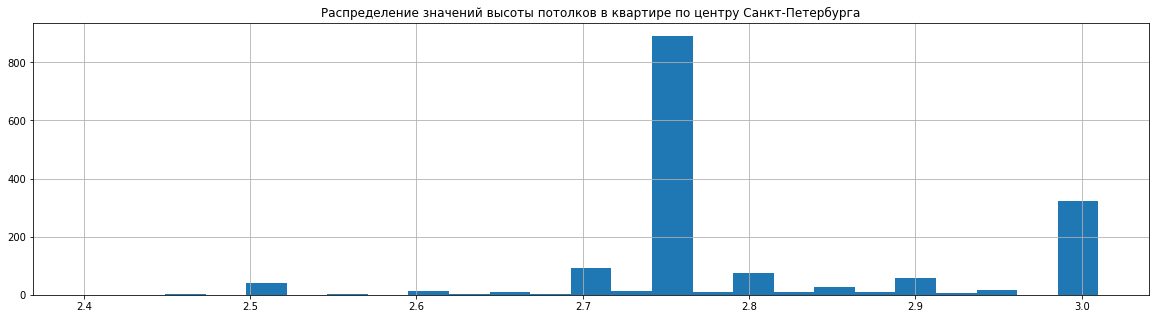

In [81]:
# построим гистограмму распределения значений высоты потолков в квартире по центру Санкт-Петербурга
good_df_center_saint_petersburg['ceiling_height_m'].hist(bins = 25,  grid = True, figsize = (20, 5))
plt.title('Распределение значений высоты потолков в квартире по центру Санкт-Петербурга')

In [82]:
# рассчитаем коэффициенты корреляции значений цены квартиры, количества комнат и расстояния до центра города
# для центра Санкт-Петербурга
corr_center_saint_petersburg = good_df_center_saint_petersburg[['last_price', 'rooms', 'distance_city_center__m']].\
                               corr().round(2)
corr_center_saint_petersburg.style.background_gradient(cmap = 'coolwarm')

In [83]:
# рассчитаем коэффициенты корреляции значений цены квартиры, количества комнат и расстояния до центра города
# для всего Санкт-Петербурга
corr_saint_petersburg = good_df_saint_petersburg[['last_price', 'rooms', 'distance_city_center__m']].corr().round(2)
corr_saint_petersburg.style.background_gradient(cmap = 'coolwarm')

Text(0.5, 1.0, 'Диаграмма зависимости цены квартиры от этажа по центру Санкт-Петербурга')

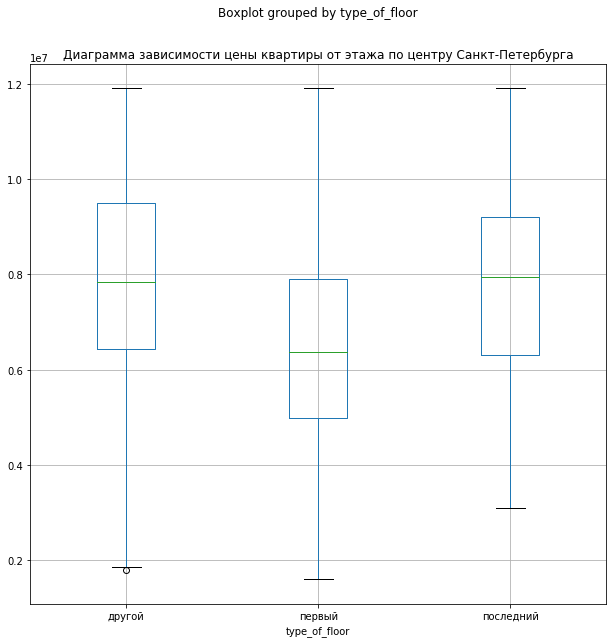

In [84]:
# построим диаграмму размаха зависимости цены квартиры от этажа по центру Санкт-Петербурга
good_df_center_saint_petersburg.boxplot('last_price', by = 'type_of_floor',figsize=(10, 10))
plt.title('Диаграмма зависимости цены квартиры от этажа по центру Санкт-Петербурга')

Text(0.5, 1.0, 'Диаграмма зависимости цены квартиры от этажа по всему Санкт-Петербургу')

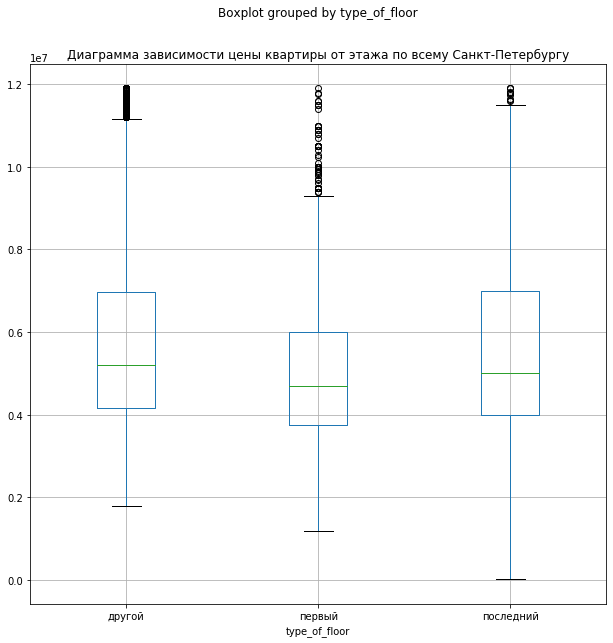

In [85]:
# построим диаграмму размаха зависимости цены квартиры от этажа по всему Санкт-Петербургу
good_df_saint_petersburg.boxplot('last_price', by = 'type_of_floor',figsize=(10, 10))
plt.title('Диаграмма зависимости цены квартиры от этажа по всему Санкт-Петербургу')

Text(0.5, 1.0, 'Графики зависимости цены квартиры от даты подачи объявления для центра и всего Санкт-Петербурга')

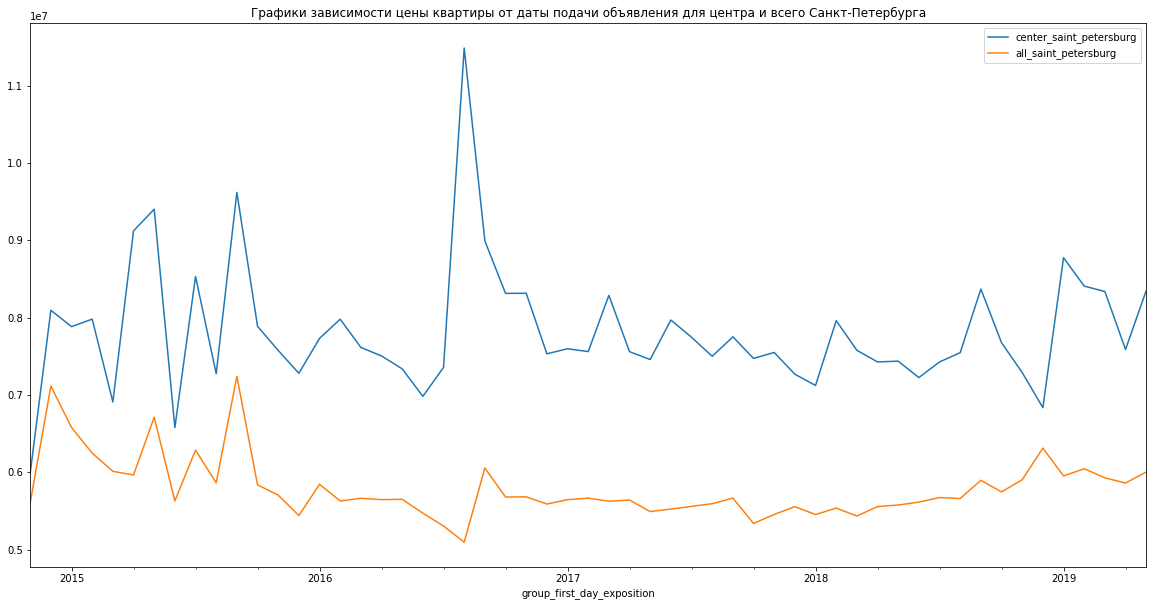

In [86]:
# построим графики зависимости цены квартиры от даты подачи объявления для центра и всего Санкт-Петербурга
good_df_center_saint_petersburg['group_first_day_exposition'] = good_df_center_saint_petersburg['first_day_exposition']\
                                                               .values.astype('datetime64[M]')
good_df_saint_petersburg['group_first_day_exposition'] = good_df_saint_petersburg['first_day_exposition']\
                                                        .values.astype('datetime64[M]')
good_df_center_saint_petersburg.groupby('group_first_day_exposition')['last_price'].mean()\
                               .plot(kind = 'line', label = 'center_saint_petersburg', figsize = (20, 10), legend = True)
good_df_saint_petersburg.groupby('group_first_day_exposition')['last_price'].mean()\
                               .plot(kind = 'line', label = 'all_saint_petersburg', figsize = (20, 10), legend = True)
plt.title('Графики зависимости цены квартиры от даты подачи объявления для центра и всего Санкт-Петербурга')

### Вывод

Проанализировав сегмент квартир в центре Санкт-Петербурга, следует отметить, что распределение значений общей площади, цены  квартиры, количества комнат и высоты потолков близко к нормальному.  
На стоимость квартиры в центре влияние количества комнат немного ниже, чем во всем Санкт-Петербурге, зависимость от расстояния до центра города практически отсутствует в отличие от среза данных по всему Санкт-Петербургу, где зависимость достаточно велика.  
По всему Санкт-Петербургу самые дорогие квартиры те, которые находятся ни на первом, ни на последнем этаже, стоимость квартир на первом и последнем этажах отличается незначительно. Для центра Санкт-Петербурга зависимость совершенно другая. Самые дорогие квартиры находятся на последнем этаже (красивые виды центра города!), стоимость же квартир на первом этаже существенно ниже.   
Есть отличия и в зависимости цены квартиры от даты подачи объявления для центра и всего Санкт-Петербурга. Так, если во всем городе заметна общая тенденция к снижению цены после 2014 года, то в центре Санкт-Петербурга цены практически не меняются.

### Шаг 5. Общий вывод    
<a name="conclusion"></a>

Таким образом можно сделать следующие выводы:     
 * типичная продаваемая квартира - это двухкомнатная квартира с общей площадью 52 квадратных метра, высотой потолков 2,7 метра, стоимостью 4,65 млн. рублей;   
 * больше всего выставлено на продажу однокомнатных квартир, большинство продаваемых квартир с небольшой общей площадью (около 40 квадратных метров) и высотой потолков около 2,7 метров. Самая распространенная цена квартиры - около 4 млн. рублей;
 * большинство квартир продается в течение 2 месяцев после публикации объявления;   
 * в данных имелись редкие и выбивающиеся значения, которые перед проведением исследования необходимо было удалить;   
 * цена квартиры находится в прямой зависимости от ее общей площади и числа комнат, чем больше квартира, тем она дороже. В то же время на цену квадратного метра количество комнат практически не влияет, а общая площадь квартиры влияет незначительно. И на цену квартиры, и на цену квадратного метра достаточно сильно влияет удалённость от центра города - чем квартира дальше, тем она дешевле;   
 * дороже всего квартиры, которые находятся ни на первом, ни на последнем этаже, самые дешевые - на первом этаже;  
 * цена квартиры ни от дня недели, ни от месяца размещения объявления не зависят, однако заметна тенденция снижения стоимости жилья после 2014 года;   
 * наибольшая средняя цена квадратного метра в Санкт-Петербурге (около 115 тысяч рублей), наименьшая - в Выборге (около 58 тысяч рублей). Стоимость жилья в Санкт-Петербурге почти в 2 раза выше стоимости жилья в населенных пунктах, не вошедших в топ-10 с наибольшим количеством объявлений;   
 * самая высокая средняя цена квартиры в самом центре Санкт-Петербурга (почти 8,4 млн.рублей), при этом чем расстояние от центра дальше, тем цена ниже;   
 * на стоимость квартиры в центре влияние количества комнат немного ниже, чем во всем Санкт-Петербурге, зависимость от расстояния до центра города практически отсутствует в отличие от среза данных по всему Санкт-Петербургу, где зависимость достаточно велика;   
 * по всему Санкт-Петербургу самые дорогие квартиры те, которые находятся ни на первом, ни на последнем этаже, стоимость квартир на первом и последнем этажах отличается незначительно. Для центра Санкт-Петербурга зависимость совершенно другая. Самые дорогие квартиры находятся на последнем этаже, стоимость же квартир на первом этаже существенно ниже;   
 * есть отличия и в зависимости цены квартиры от даты подачи объявления для центра и всего Санкт-Петербурга. Так, если во всем городе заметна общая тенденция к снижению цены после 2014 года, то в центре Санкт-Петербурга цены практически не меняются.
 

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод